In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller


In [ ]:
# 1. Load and preprocess data
df = pd.read_csv('/content/flat-ui__data-Fri Apr 18 2025.csv')

In [ ]:
df

Source     Year    Mean
0        gcag  1850-01 -0.6746
1        gcag  1850-02 -0.3334
2        gcag  1850-03 -0.5913
3        gcag  1850-04 -0.5887
4        gcag  1850-05 -0.5088
...       ...      ...     ...
3818  GISTEMP  2023-08  1.1900
3819  GISTEMP  2023-09  1.4800
3820  GISTEMP  2023-10  1.3400
3821  GISTEMP  2023-11  1.4200
3822  GISTEMP  2023-12  1.3500

[3823 rows x 3 columns]

In [ ]:
# Convert to datetime
df['Date'] = pd.to_datetime(df['Year'], format='%Y-%m')
df = df.sort_values('Date')

In [ ]:
# Filter for one source to keep it simple
gcag_df = df[df['Source'] == 'gcag'].copy()
gcag_df = gcag_df.set_index('Date')

In [ ]:
gcag_df

Source     Year    Mean
Date                              
1850-01-01   gcag  1850-01 -0.6746
1850-02-01   gcag  1850-02 -0.3334
1850-03-01   gcag  1850-03 -0.5913
1850-04-01   gcag  1850-04 -0.5887
1850-05-01   gcag  1850-05 -0.5088
...           ...      ...     ...
2024-03-01   gcag  2024-03  1.2515
2024-04-01   gcag  2024-04  1.2053
2024-05-01   gcag  2024-05  1.0745
2024-06-01   gcag  2024-06  1.1154
2024-07-01   gcag  2024-07  1.1398

[2095 rows x 3 columns]

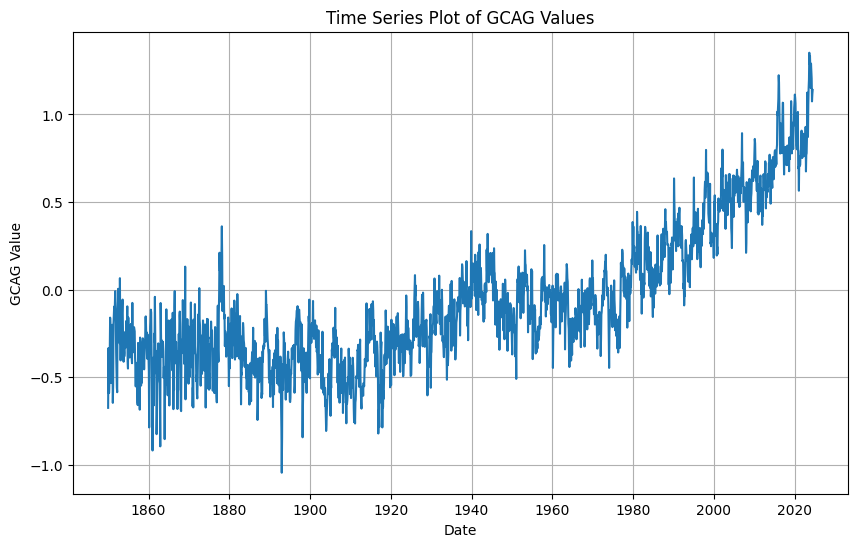

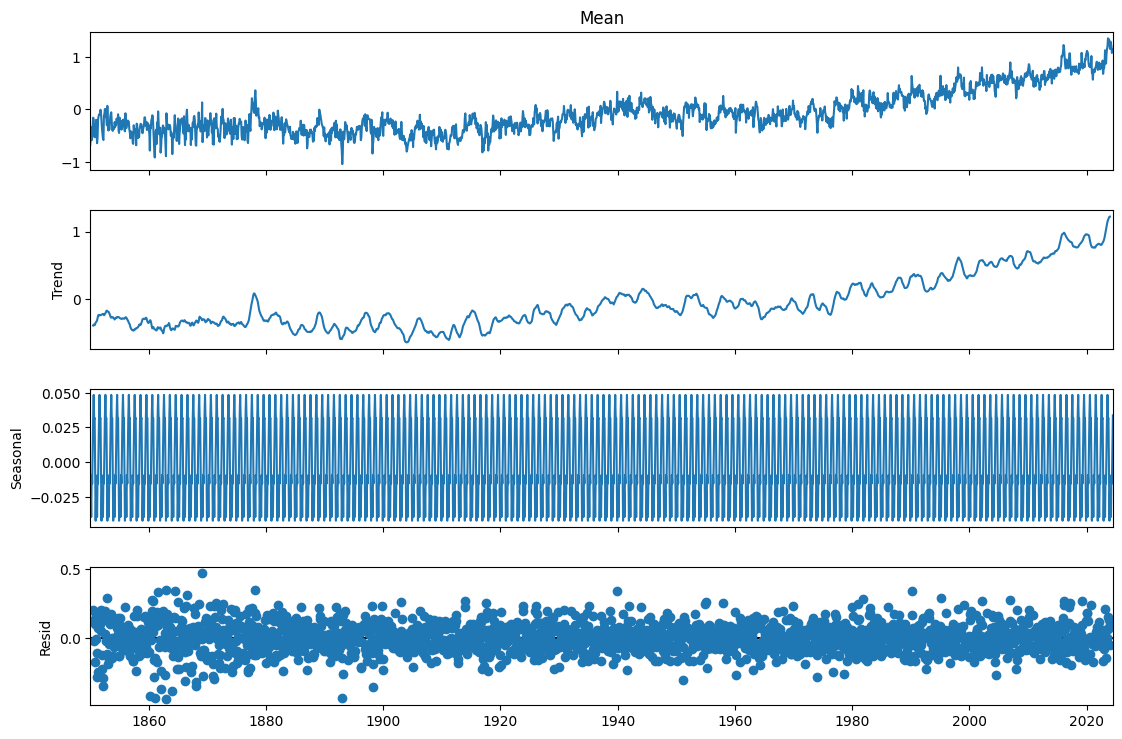

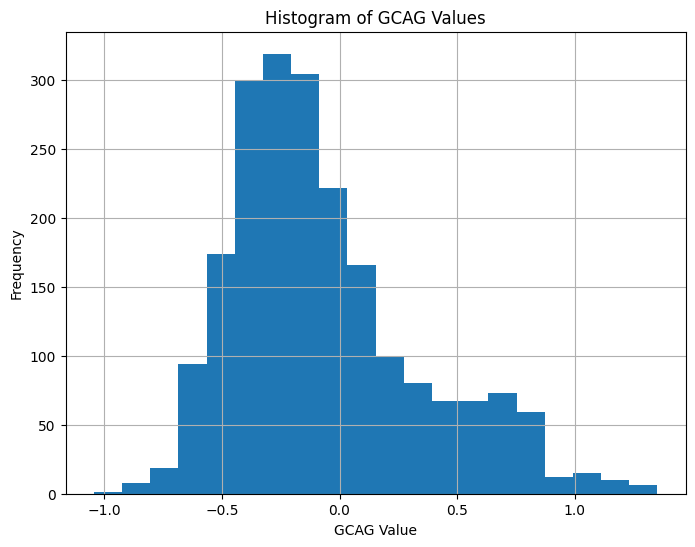

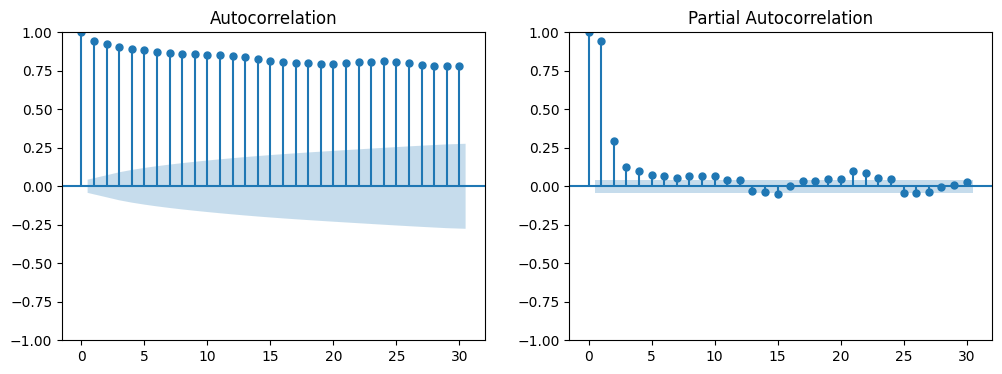

In [ ]:
# prompt: give me some recommeded plots on gcag_df

import matplotlib.pyplot as plt
# Time series plot
plt.figure(figsize=(10, 6))
plt.plot(gcag_df['Mean'])
plt.title('Time Series Plot of GCAG Values')
plt.xlabel('Date')
plt.ylabel('GCAG Value')
plt.grid(True)
plt.show()

# Seasonal decomposition
decomposition = seasonal_decompose(gcag_df['Mean'], model='additive', period=12) # Assuming yearly seasonality
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

# Histogram
plt.figure(figsize=(8, 6))
plt.hist(gcag_df['Mean'], bins=20)  # Adjust bins as needed
plt.title('Histogram of GCAG Values')
plt.xlabel('GCAG Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Boxplot (if you have categories to compare)
#  If you had another column to group by in gcag_df, you could use that here.
#  For example, if you had a "Region" column, you could replace "Value" with "Region" in the line below:
# plt.figure(figsize=(8, 6))
# gcag_df.boxplot(column='Value', by='Region')  #  'Region' would be the column containing categorical information
# plt.title('Boxplot of GCAG Values by Region')
# plt.suptitle('') # Remove the automatic title
# plt.show()

# Autocorrelation and Partial Autocorrelation plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(gcag_df['Mean'], lags=30, ax=axes[0])
plot_pacf(gcag_df['Mean'], lags=30, ax=axes[1])
plt.show()


In [ ]:
gtemp_df = df[df['Source'] == 'GISTEMP'].copy()
gtemp_df = gtemp_df.set_index('Date')
gtemp_df

Source     Year  Mean
Date                              
1880-01-01  GISTEMP  1880-01 -0.20
1880-02-01  GISTEMP  1880-02 -0.25
1880-03-01  GISTEMP  1880-03 -0.09
1880-04-01  GISTEMP  1880-04 -0.16
1880-05-01  GISTEMP  1880-05 -0.09
...             ...      ...   ...
2023-08-01  GISTEMP  2023-08  1.19
2023-09-01  GISTEMP  2023-09  1.48
2023-10-01  GISTEMP  2023-10  1.34
2023-11-01  GISTEMP  2023-11  1.42
2023-12-01  GISTEMP  2023-12  1.35

[1728 rows x 3 columns]

We will for now perform time series analysis for gcag first.

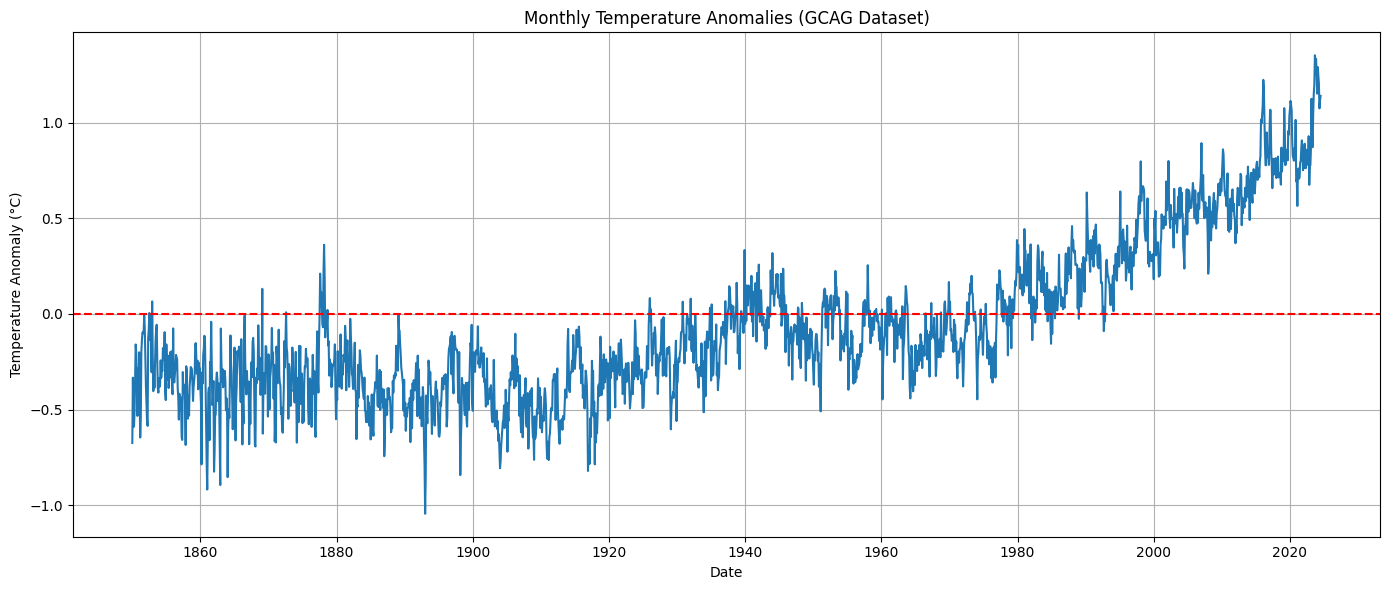

In [ ]:
# 2. Plot time series
plt.figure(figsize=(14, 6))
plt.plot(gcag_df.index, gcag_df['Mean'])
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Monthly Temperature Anomalies (GCAG Dataset)')
plt.xlabel('Date')
plt.ylabel('Temperature Anomaly (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()

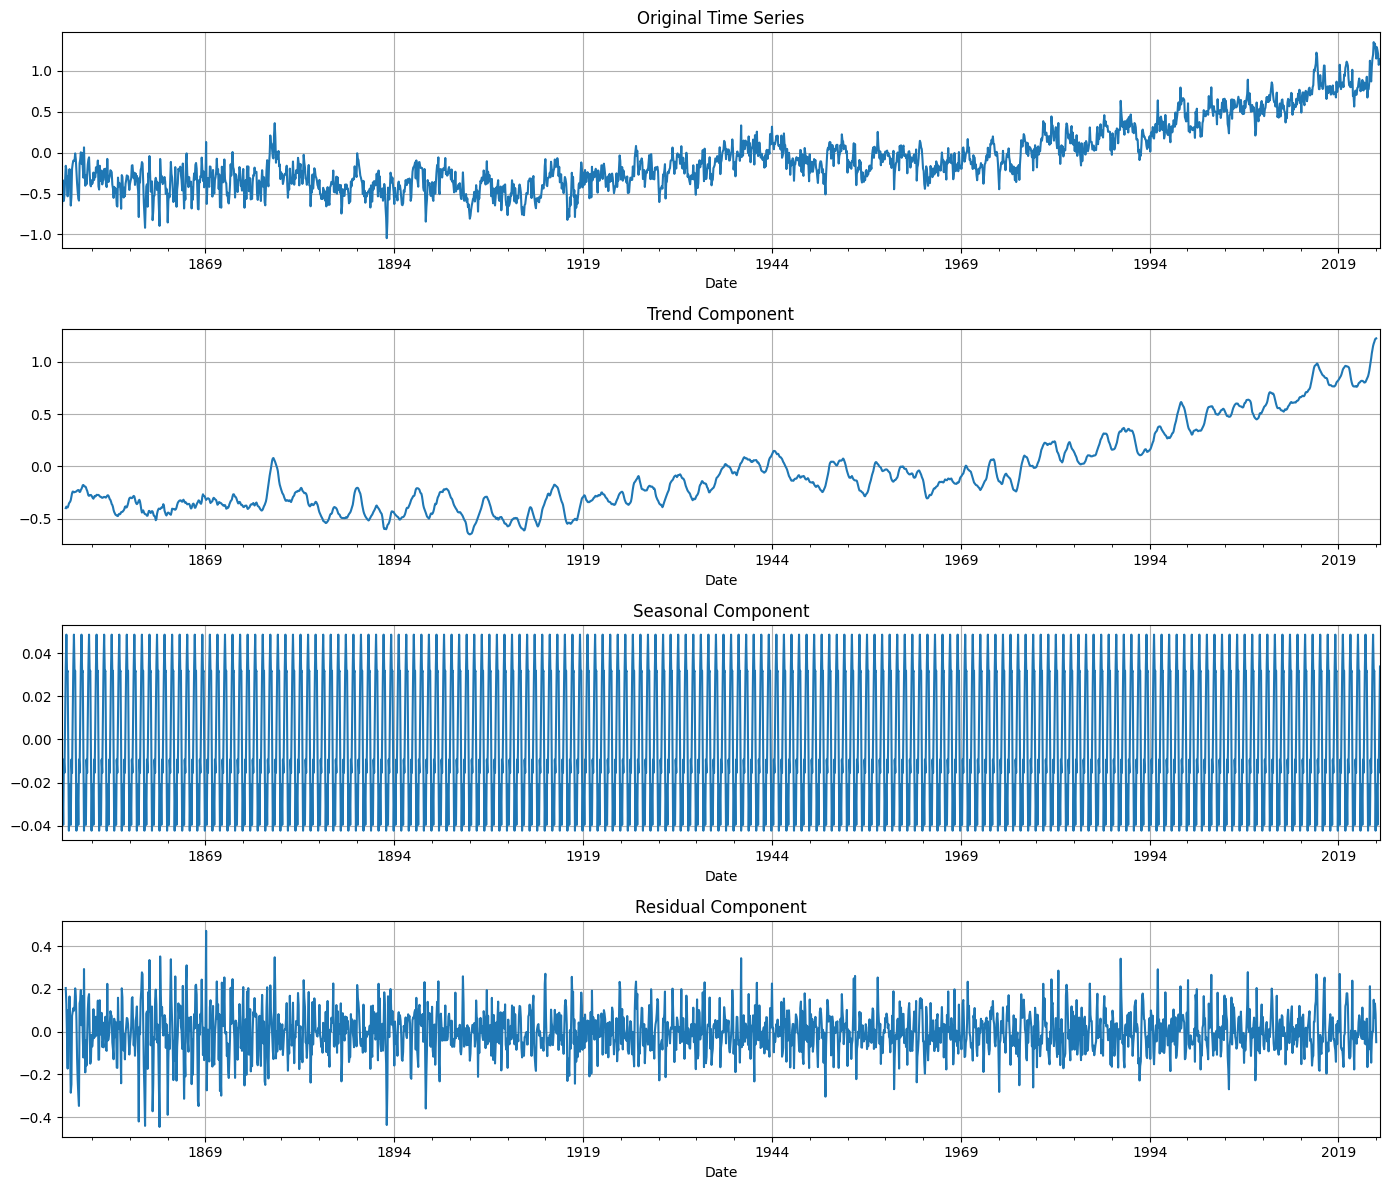

In [ ]:
# 3. Decompose the time series
decomposition = seasonal_decompose(gcag_df['Mean'], model='additive', period=12)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 12))
decomposition.observed.plot(ax=ax1)
ax1.set_title('Original Time Series')
ax1.grid(True)

decomposition.trend.plot(ax=ax2)
ax2.set_title('Trend Component')
ax2.grid(True)

decomposition.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal Component')
ax3.grid(True)

decomposition.resid.plot(ax=ax4)
ax4.set_title('Residual Component')
ax4.grid(True)

plt.tight_layout()
plt.show()

In [ ]:

# 4. ADF Test for stationarity
result = adfuller(gcag_df['Mean'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpret the results
if result[0] < result[4]['5%']:
    print('Result: The series is stationary (reject H0)')
else:
    print('Result: The series is non-stationary (fail to reject H0)')

ADF Statistic: -0.156107
p-value: 0.943555
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Result: The series is non-stationary (fail to reject H0)


In [ ]:

# Apply first differencing
gcag_df['Mean_Diff'] = gcag_df['Mean'].diff()

In [ ]:
# prompt: check where there are null values in gcag_df

# Check for null values in gcag_df
print(gcag_df.isnull().sum())


Source       0
Year         0
Mean         0
Mean_Diff    1
dtype: int64


In [ ]:
# Drop the NaN value that results from differencing
gcag_df_diff = gcag_df.dropna()

In [ ]:
# Run ADF test on the differenced series
diff_result = adfuller(gcag_df_diff['Mean_Diff'].dropna())
print('Differenced Series:')
print('ADF Statistic: %f' % diff_result[0])
print('p-value: %f' % diff_result[1])
print('Critical Values:')
for key, value in diff_result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpret the results
if diff_result[0] < diff_result[4]['5%']:
    print('Result: The differenced series is stationary (reject H0)')
else:
    print('Result: The differenced series is non-stationary (fail to reject H0)')

Differenced Series:
ADF Statistic: -12.314243
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Result: The differenced series is stationary (reject H0)


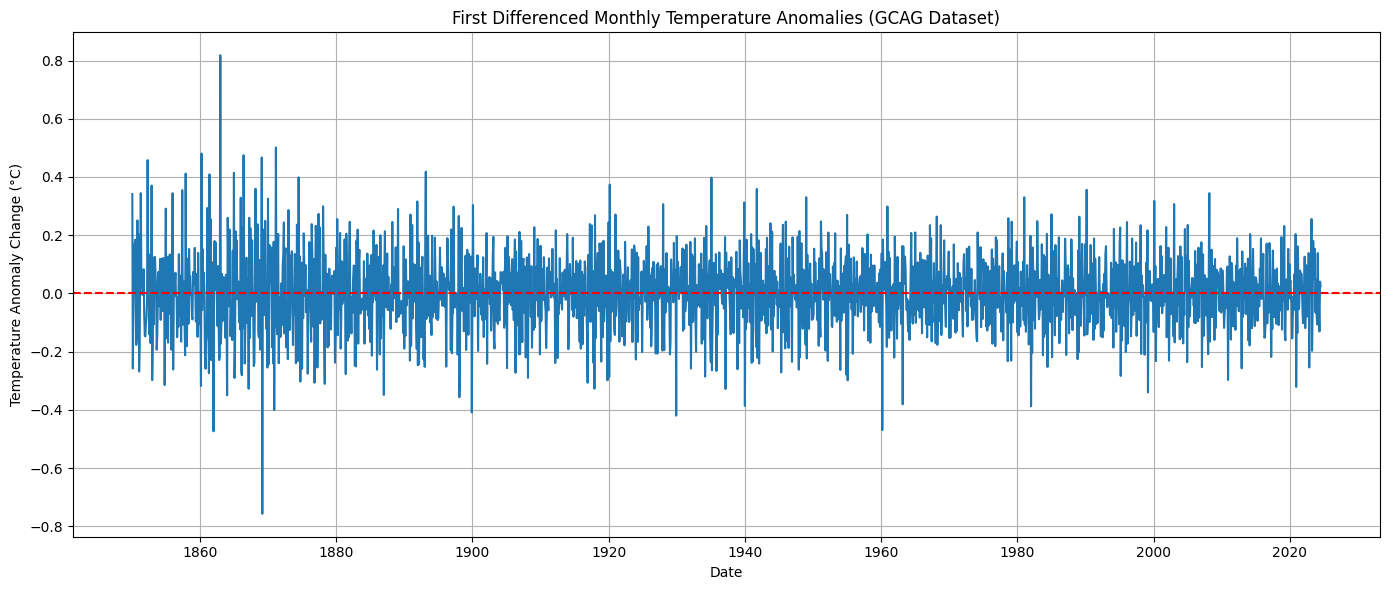

In [ ]:
# Plot the differenced series
plt.figure(figsize=(14, 6))
plt.plot(gcag_df_diff.index, gcag_df_diff['Mean_Diff'])
plt.axhline(y=0, color='r', linestyle='--')
plt.title('First Differenced Monthly Temperature Anomalies (GCAG Dataset)')
plt.xlabel('Date')
plt.ylabel('Temperature Anomaly Change (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()

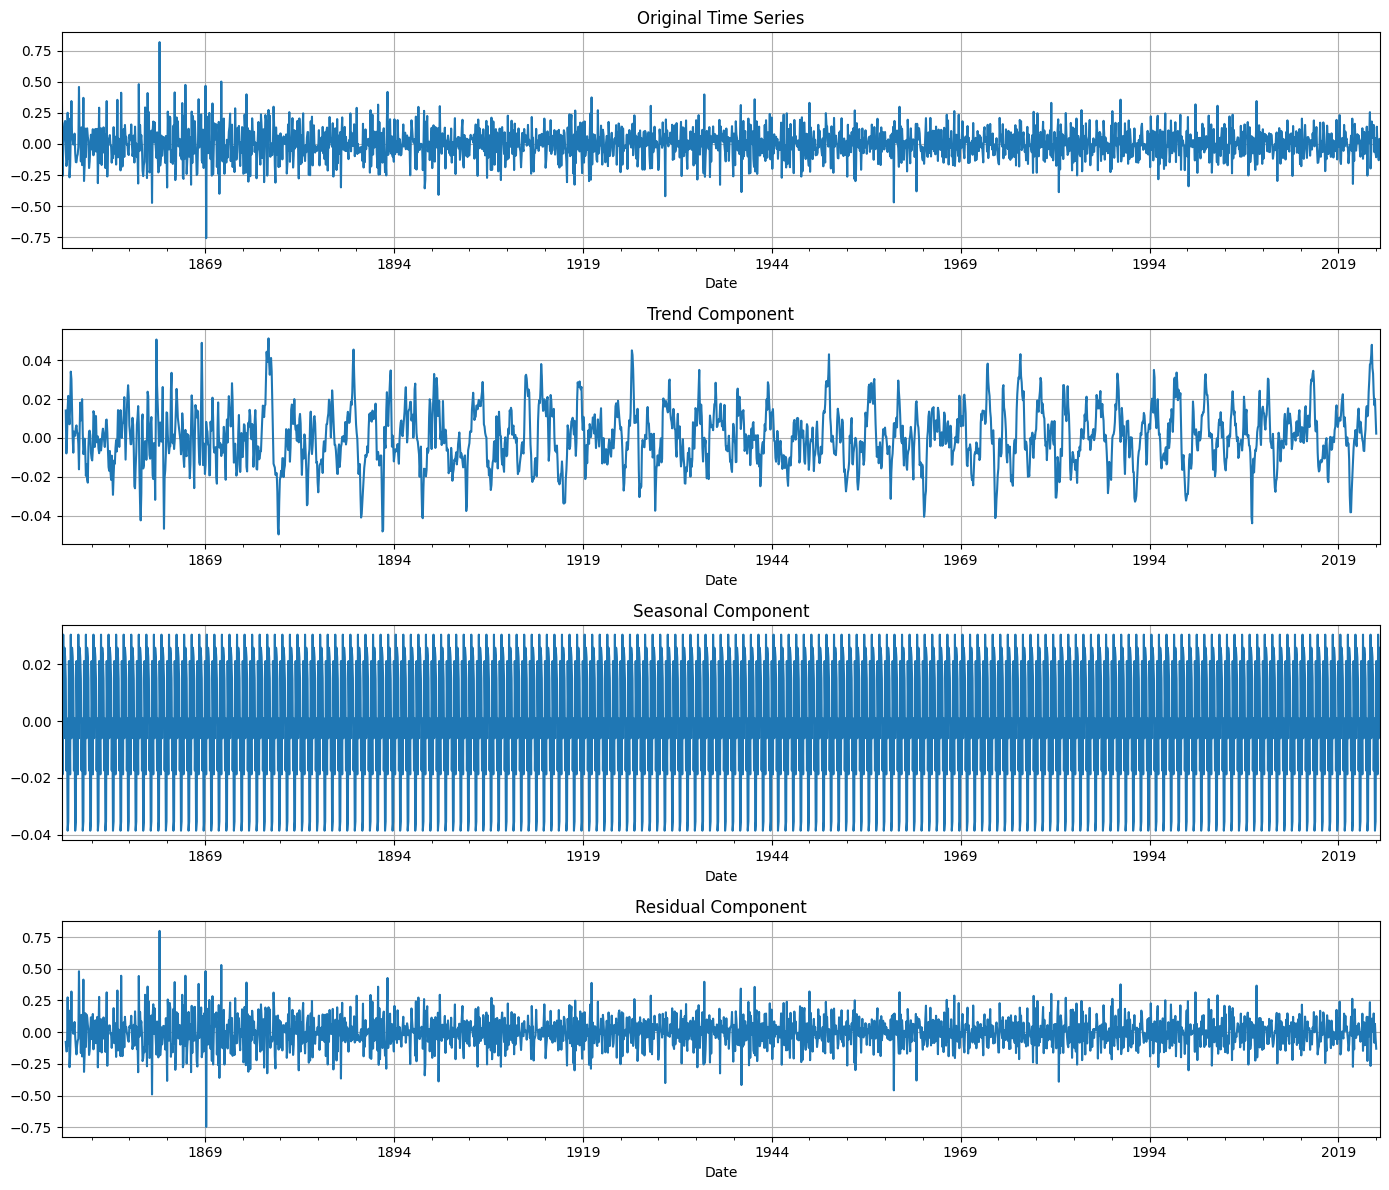

In [ ]:
# 3. Decompose the time series
decomposition = seasonal_decompose(gcag_df_diff['Mean_Diff'], model='additive', period=12)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 12))
decomposition.observed.plot(ax=ax1)
ax1.set_title('Original Time Series')
ax1.grid(True)

decomposition.trend.plot(ax=ax2)
ax2.set_title('Trend Component')
ax2.grid(True)

decomposition.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal Component')
ax3.grid(True)

decomposition.resid.plot(ax=ax4)
ax4.set_title('Residual Component')
ax4.grid(True)

plt.tight_layout()
plt.show()

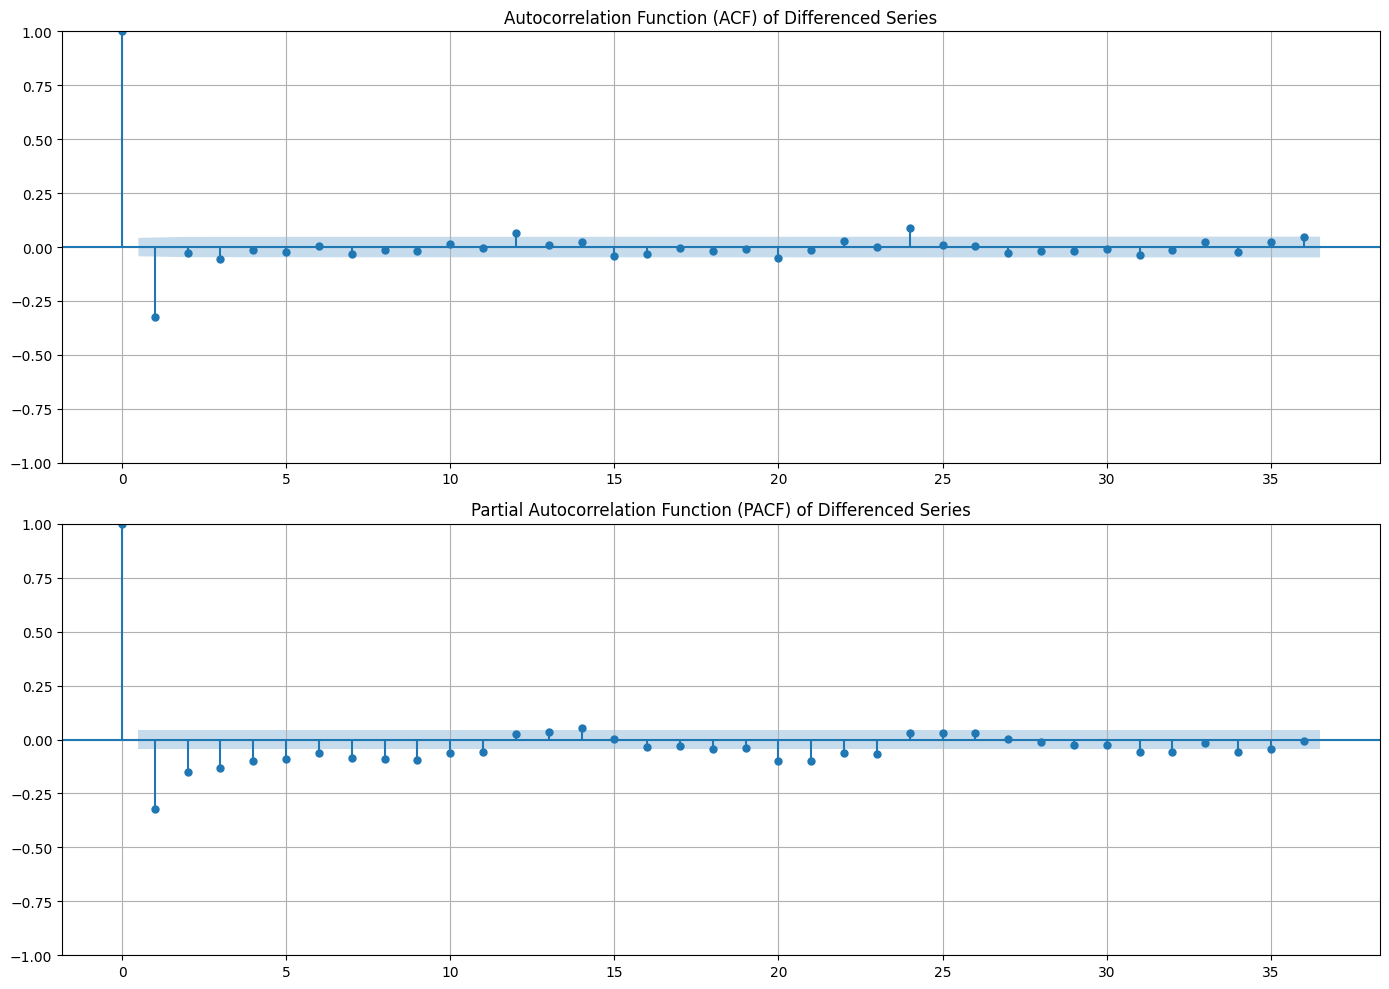

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Create figure for ACF and PACF plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Plot ACF
plot_acf(gcag_df_diff['Mean_Diff'].dropna(), lags=36, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF) of Differenced Series')
ax1.grid(True)

# Plot PACF
plot_pacf(gcag_df_diff['Mean_Diff'].dropna(), lags=36, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF) of Differenced Series')
ax2.grid(True)

plt.tight_layout()
plt.show()

Evaluating SARIMA(0,0,0)(0,0,0,12)
New best AIC: 2185.5532531529825, with parameters: (0, 0, 0, 0, 0, 0, 12)
Evaluating SARIMA(0,0,0)(0,0,1,12)
New best AIC: 840.3055679497149, with parameters: (0, 0, 0, 0, 0, 1, 12)
Evaluating SARIMA(0,0,0)(0,0,2,12)
New best AIC: 171.02669928624863, with parameters: (0, 0, 0, 0, 0, 2, 12)
Evaluating SARIMA(0,0,0)(0,1,0,12)
New best AIC: -850.9789688675143, with parameters: (0, 0, 0, 0, 1, 0, 12)
Evaluating SARIMA(0,0,0)(0,1,1,12)
New best AIC: -1581.3943277366727, with parameters: (0, 0, 0, 0, 1, 1, 12)
Evaluating SARIMA(0,0,0)(0,1,2,12)
Evaluating SARIMA(0,0,0)(1,0,0,12)
Evaluating SARIMA(0,0,0)(1,0,1,12)
New best AIC: -1588.5820247214742, with parameters: (0, 0, 0, 1, 0, 1, 12)
Evaluating SARIMA(0,0,0)(1,0,2,12)
Evaluating SARIMA(0,0,0)(1,1,0,12)
Evaluating SARIMA(0,0,0)(1,1,1,12)
Evaluating SARIMA(0,0,0)(1,1,2,12)
Evaluating SARIMA(0,0,0)(2,0,0,12)
Evaluating SARIMA(0,0,0)(2,0,1,12)
Evaluating SARIMA(0,0,0)(2,0,2,12)
Evaluating SARIMA(0,0,0)(2,1,0

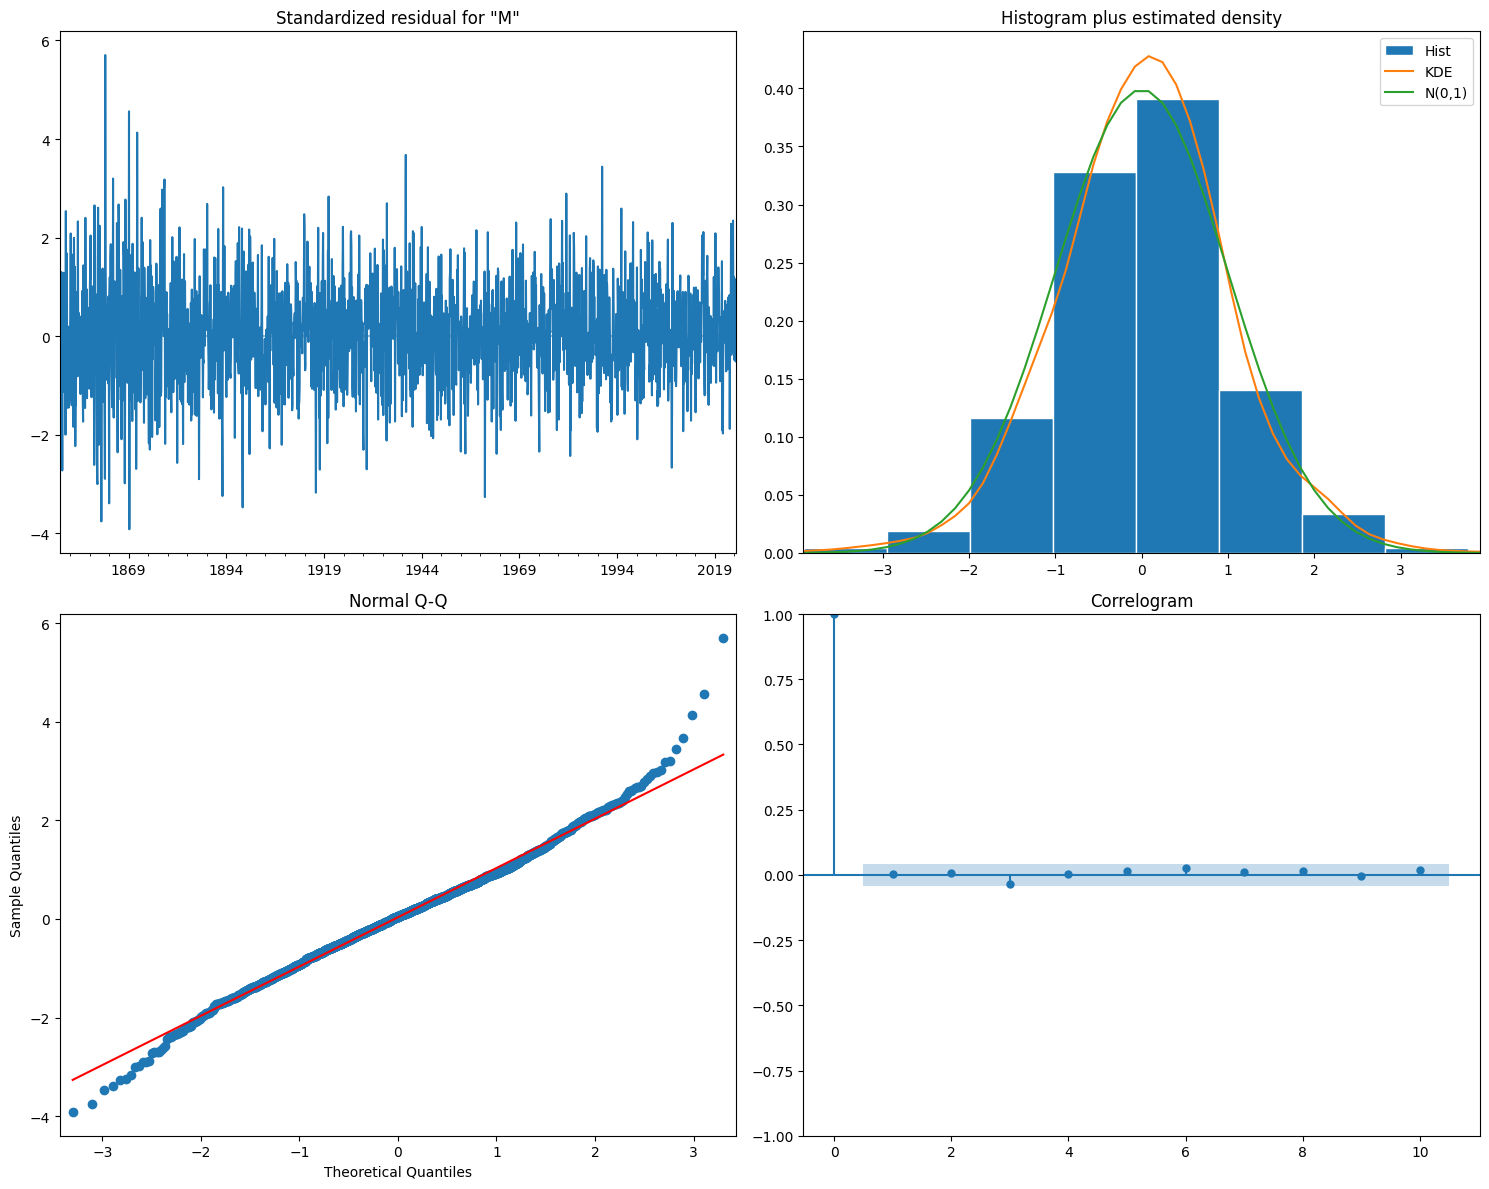

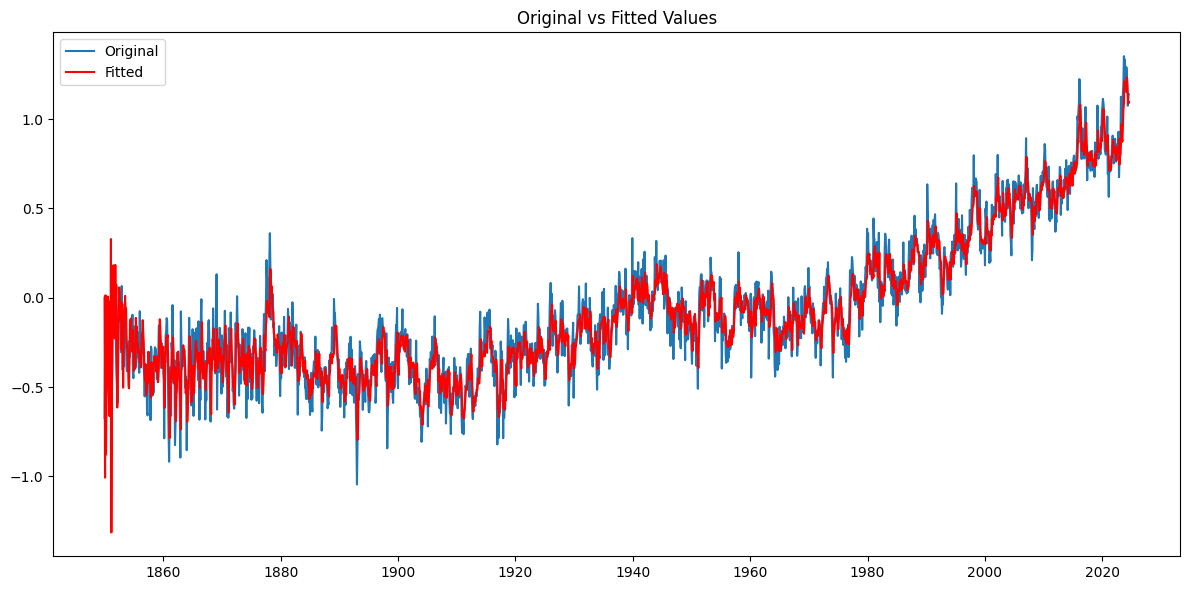

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")

# Create a function to evaluate SARIMA models
def evaluate_sarima_model(p, d, q, P, D, Q, s, data):
    try:
        model = SARIMAX(data,
                        order=(p, d, q),
                        seasonal_order=(P, D, Q, s),
                        enforce_stationarity=False,
                        enforce_invertibility=False)
        results = model.fit(disp=0)
        return results.aic, results
    except:
        return float("inf"), None

# Search through a grid of SARIMA parameters
best_aic = float("inf")
best_params = None
best_model = None

# Define parameter ranges to search
p_range = range(0, 3)
d_range = range(0, 2)
q_range = range(0, 3)
P_range = range(0, 3)
D_range = range(0, 2)
Q_range = range(0, 3)
s = 12  # Monthly seasonality

# Grid search
for p in p_range:
    for d in d_range:
        for q in q_range:
            for P in P_range:
                for D in D_range:
                    for Q in Q_range:
                        print(f"Evaluating SARIMA({p},{d},{q})({P},{D},{Q},{s})")
                        aic, model = evaluate_sarima_model(p, d, q, P, D, Q, s, gcag_df['Mean'])
                        if aic < best_aic:
                            best_aic = aic
                            best_params = (p, d, q, P, D, Q, s)
                            best_model = model
                            print(f"New best AIC: {best_aic}, with parameters: {best_params}")

print(f"Best model: SARIMA{best_params}")
print(f"AIC: {best_aic}")

# Print model summary
if best_model is not None:
    print(best_model.summary())

    # Plot diagnostics
    best_model.plot_diagnostics(figsize=(15, 12))
    plt.tight_layout()
    plt.show()

    # Get fitted values
    fitted = best_model.fittedvalues

    # Plot original data vs fitted
    plt.figure(figsize=(12, 6))
    plt.plot(gcag_df.index, gcag_df['Mean'], label='Original')
    plt.plot(gcag_df.index, fitted, color='red', label='Fitted')
    plt.legend()
    plt.title('Original vs Fitted Values')
    plt.tight_layout()
    plt.show()

                                      SARIMAX Results                                       
Dep. Variable:                                 Mean   No. Observations:                 2095
Model:             SARIMAX(1, 1, 2)x(0, 1, [1], 12)   Log Likelihood                1532.247
Date:                              Sun, 20 Apr 2025   AIC                          -3054.495
Time:                                      15:28:50   BIC                          -3026.325
Sample:                                  01-01-1850   HQIC                         -3044.169
                                       - 07-01-2024                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8584      0.020     42.370      0.000       0.819       0.898
ma.L1         -1.38

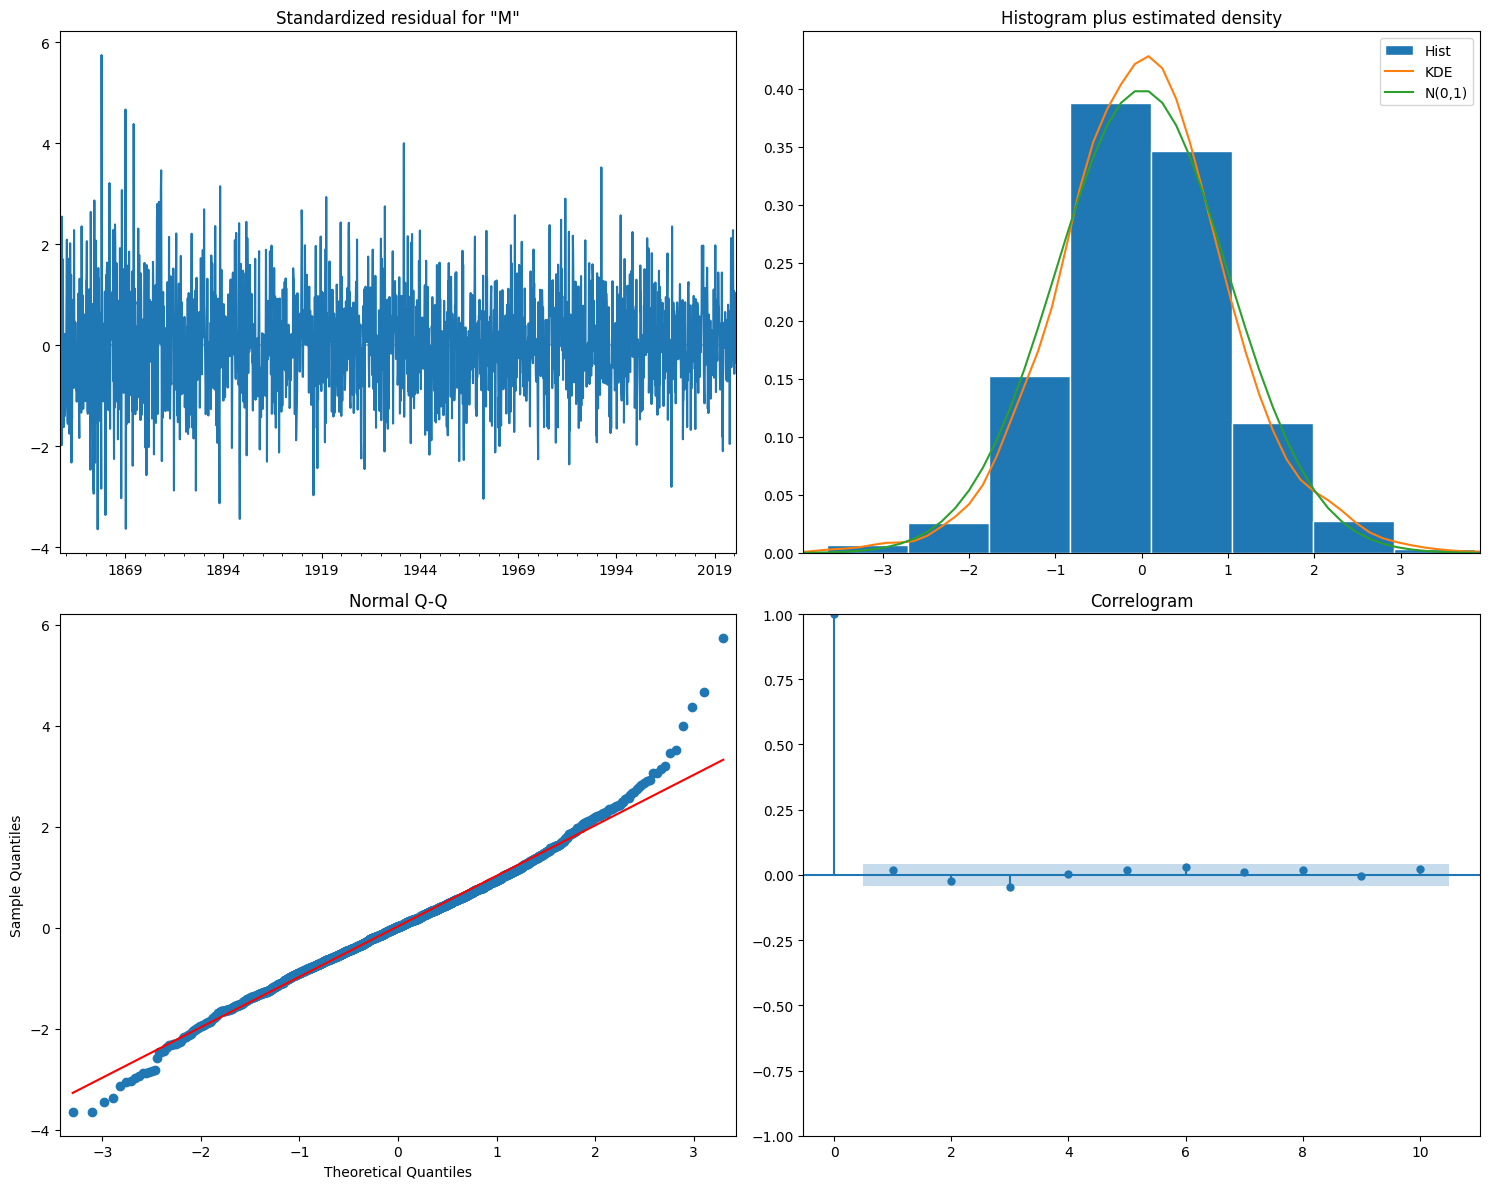

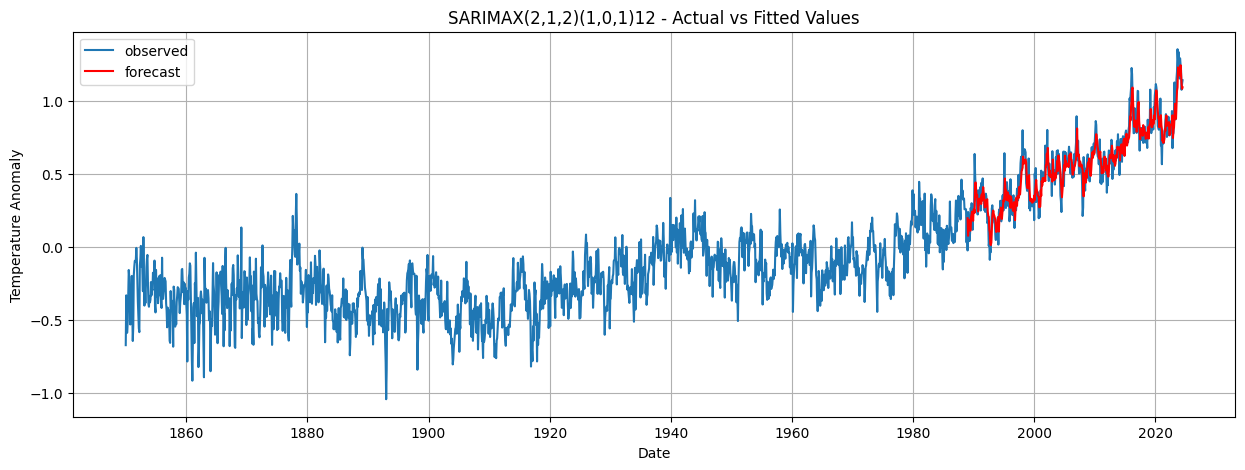

In [ ]:
model = SARIMAX(
    gcag_df['Mean'],
    order=(1, 1, 2),
    seasonal_order=(0, 1, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
)

# Fit the model
results = model.fit(disp=False)

# Print a summary of the model
print(results.summary())

# Plot diagnostics
results.plot_diagnostics(figsize=(15, 12))
plt.tight_layout()
plt.show()

# Plot actual vs fitted values
fig, ax = plt.subplots(figsize=(15, 5))
pred = results.get_prediction(start=pd.to_datetime('1989-01-01'))
pred_ci = pred.conf_int()

ax.plot(gcag_df.index, gcag_df['Mean'], label='observed')
ax.plot(pred.predicted_mean.index, pred.predicted_mean, 'r', label='forecast')
#ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='pink', alpha=0.3)
ax.set_xlabel('Date')
ax.set_ylabel('Temperature Anomaly')
ax.set_title('SARIMAX(2,1,2)(1,0,1)12 - Actual vs Fitted Values')
ax.legend()
plt.grid(True)
plt.show()


                                      SARIMAX Results                                       
Dep. Variable:                                 Mean   No. Observations:                 2095
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood                1550.310
Date:                              Sun, 20 Apr 2025   AIC                          -3088.619
Time:                                      10:17:07   BIC                          -3054.782
Sample:                                  01-01-1850   HQIC                         -3076.219
                                       - 07-01-2024                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8528      0.022     38.881      0.000       0.810       0.896
ma.L1         -1.38

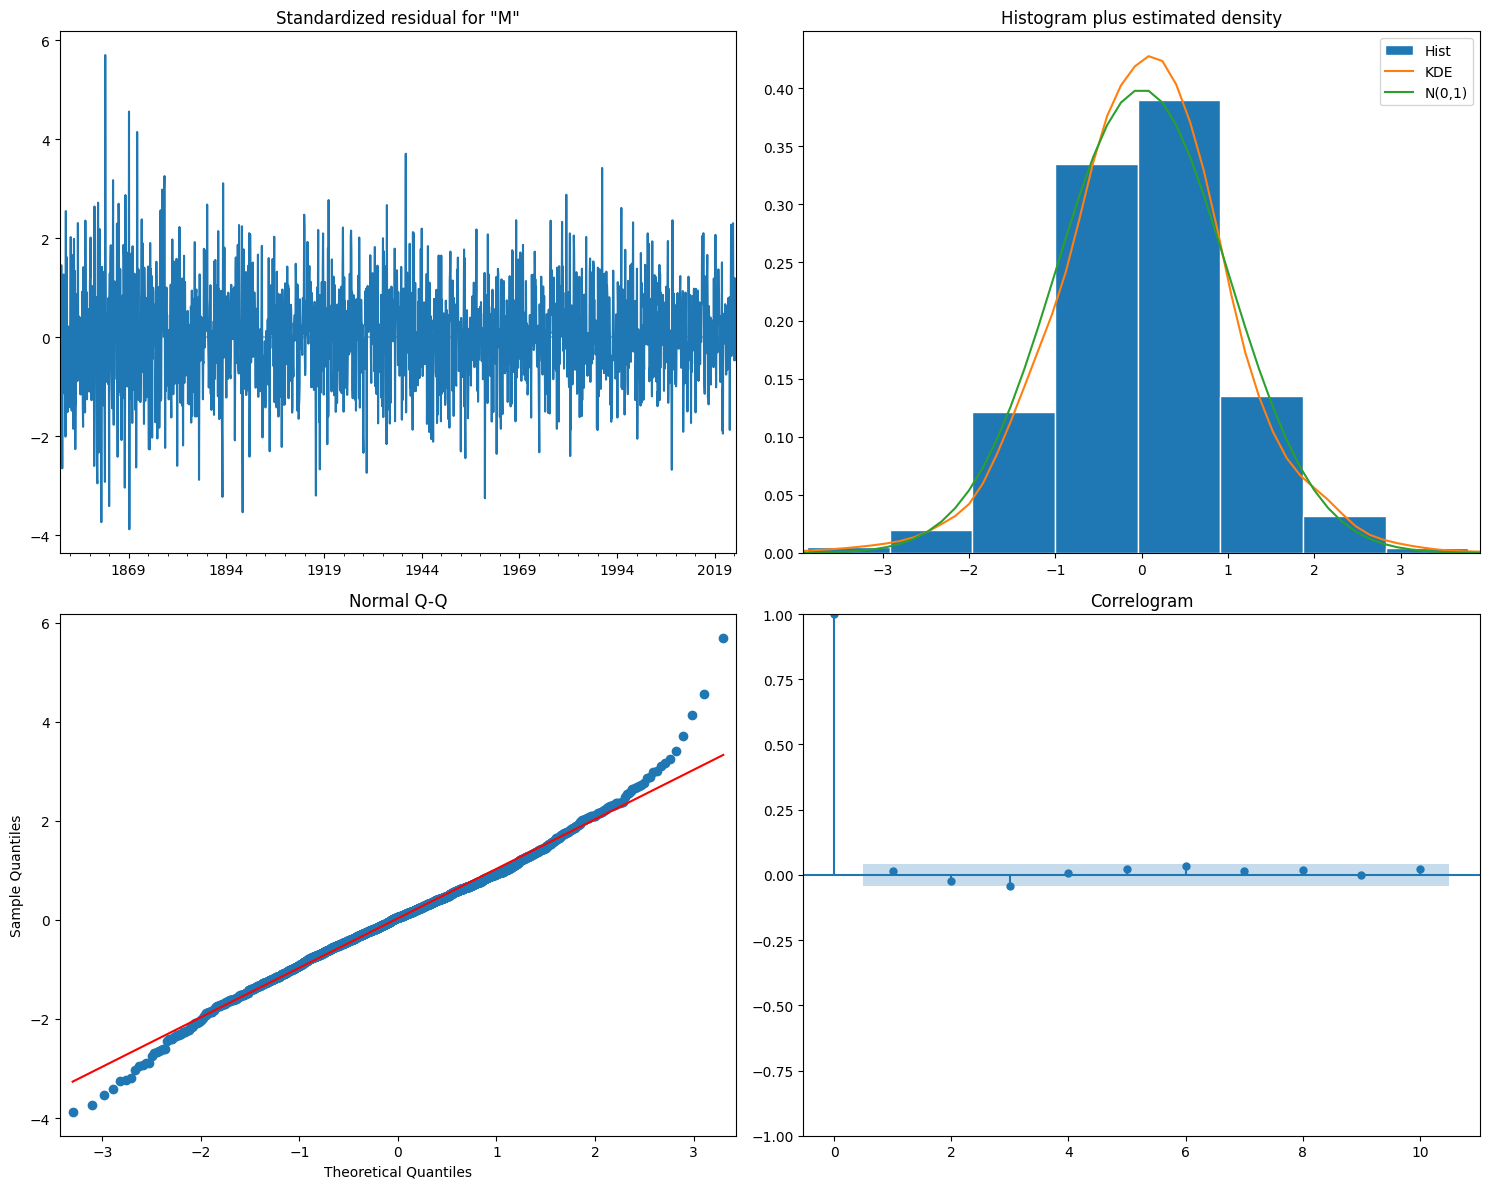

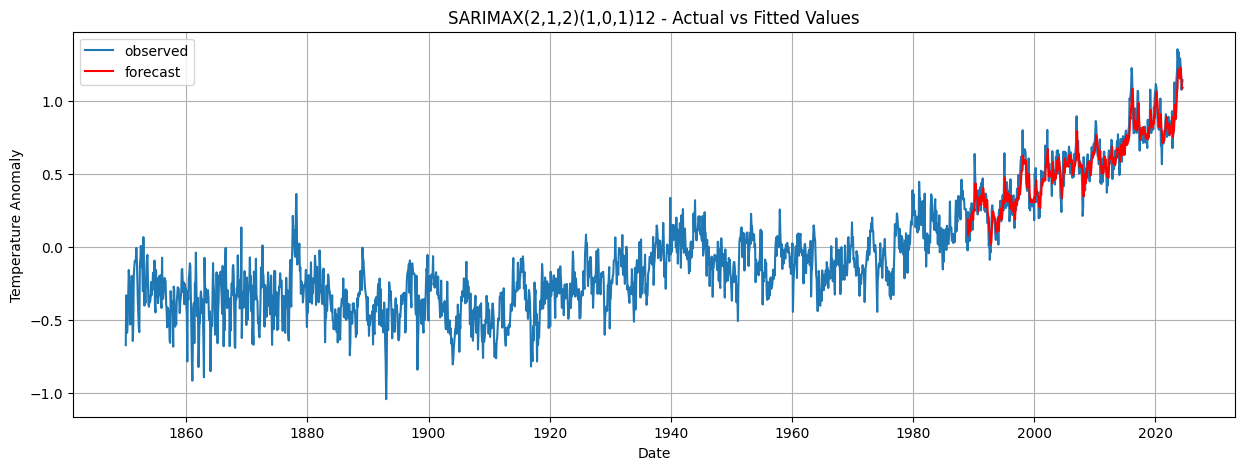

In [ ]:
model = SARIMAX(
    gcag_df['Mean'],
    order=(1, 1, 2),
    seasonal_order=(1, 0, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
)

# Fit the model
results = model.fit(disp=False)

# Print a summary of the model
print(results.summary())

# Plot diagnostics
results.plot_diagnostics(figsize=(15, 12))
plt.tight_layout()
plt.show()

# Plot actual vs fitted values
fig, ax = plt.subplots(figsize=(15, 5))
pred = results.get_prediction(start=pd.to_datetime('1989-01-01'))
pred_ci = pred.conf_int()

ax.plot(gcag_df.index, gcag_df['Mean'], label='observed')
ax.plot(pred.predicted_mean.index, pred.predicted_mean, 'r', label='forecast')
#ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='pink', alpha=0.3)
ax.set_xlabel('Date')
ax.set_ylabel('Temperature Anomaly')
ax.set_title('SARIMAX(2,1,2)(1,0,1)12 - Actual vs Fitted Values')
ax.legend()
plt.grid(True)
plt.show()


Training data size: 1780
Testing data size: 315
Training data from 1850-01-01 00:00:00 to 1998-04-01 00:00:00
Testing data from 1998-05-01 00:00:00 to 2024-07-01 00:00:00
                                      SARIMAX Results                                       
Dep. Variable:                                 Mean   No. Observations:                 1780
Model:             SARIMAX(1, 1, 2)x(1, 1, [1], 12)   Log Likelihood                1252.605
Date:                              Sun, 20 Apr 2025   AIC                          -2493.209
Time:                                      16:19:57   BIC                          -2460.398
Sample:                                  01-01-1850   HQIC                         -2481.081
                                       - 04-01-1998                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------

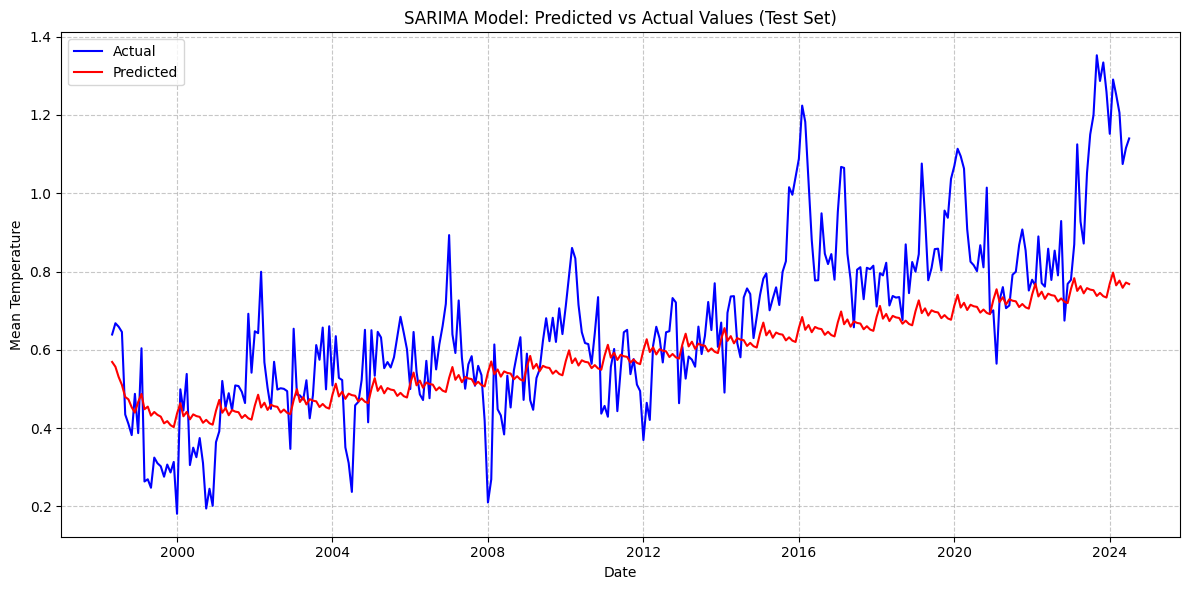

Root Mean Squared Error (RMSE): 0.1780
Mean Absolute Error (MAE): 0.1326
R-squared (R²): 0.3777


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# Assuming gcag_df is your prepared dataframe with 'Mean' as the target column
# and the index is already datetime

# Train-test split (85-15)
train_size = int(len(gcag_df) * 0.85)
train_data = gcag_df.iloc[:train_size]
test_data = gcag_df.iloc[train_size:]

print(f"Training data size: {len(train_data)}")
print(f"Testing data size: {len(test_data)}")
print(f"Training data from {train_data.index[0]} to {train_data.index[-1]}")
print(f"Testing data from {test_data.index[0]} to {test_data.index[-1]}")

# Train the SARIMA model with the suggested parameters (2,1,2)(1,0,1,12)
model = SARIMAX(train_data['Mean'],
                order=(1, 1, 2),
                seasonal_order=(1, 1, 1, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)

model_fit = model.fit(disp=0)
print(model_fit.summary())

# Forecast for the test period
forecast = model_fit.get_forecast(steps=len(test_data))
predicted_mean = forecast.predicted_mean

# Plot only the test data and predictions (no training data or confidence intervals)
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Mean'], label='Actual', color='blue')
plt.plot(test_data.index, predicted_mean, label='Predicted', color='red')
plt.title('SARIMA Model: Predicted vs Actual Values (Test Set)')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(test_data['Mean'], predicted_mean))
mae = mean_absolute_error(test_data['Mean'], predicted_mean)
r2 = r2_score(test_data['Mean'], predicted_mean)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

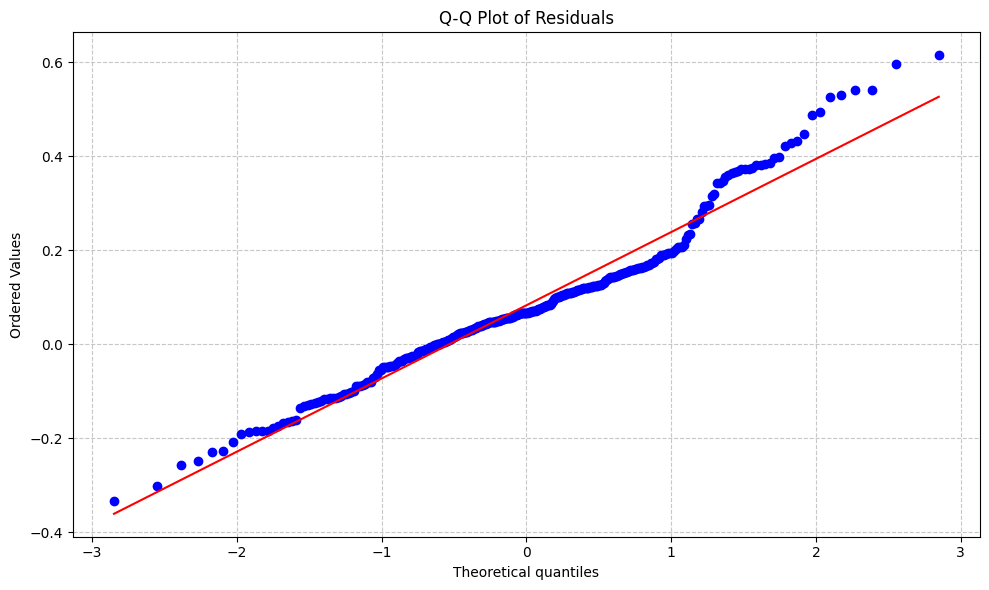

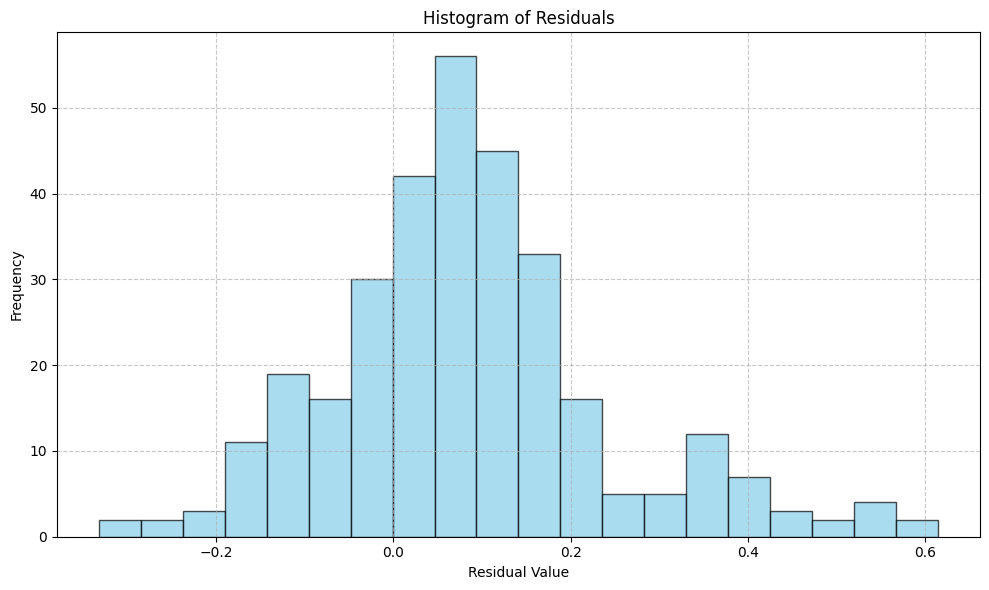

Mean of residuals: 0.082996
Standard deviation of residuals: 0.157490
Shapiro-Wilk test for normality (p-value): 0.000000
The residuals do NOT follow a normal distribution (p-value: 0.000000 < 0.05).
D'Agostino-Pearson test rejects normality (p-value: 0.000001 < 0.05).


In [ ]:
import scipy.stats as stats

# Calculate residuals for the test set
residuals = test_data['Mean'].values - predicted_mean.values

# Create Q-Q plot
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Additionally, plot a histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Calculate statistics about the residuals
mean_residuals = np.mean(residuals)
std_residuals = np.std(residuals)
shapiro_test = stats.shapiro(residuals)
shapiro_p_value = shapiro_test[1]

print(f"Mean of residuals: {mean_residuals:.6f}")
print(f"Standard deviation of residuals: {std_residuals:.6f}")
print(f"Shapiro-Wilk test for normality (p-value): {shapiro_p_value:.6f}")

# Determine if residuals are normally distributed
alpha = 0.05
if shapiro_p_value > alpha:
    print(f"The residuals follow a normal distribution (p-value: {shapiro_p_value:.6f} > {alpha}).")
else:
    print(f"The residuals do NOT follow a normal distribution (p-value: {shapiro_p_value:.6f} < {alpha}).")

# Additional normality test (D'Agostino and Pearson's test)
k2, p_value = stats.normaltest(residuals)
if p_value > alpha:
    print(f"D'Agostino-Pearson test confirms normality (p-value: {p_value:.6f} > {alpha}).")
else:
    print(f"D'Agostino-Pearson test rejects normality (p-value: {p_value:.6f} < {alpha}).")

Completed 0/419 predictions
Completed 10/419 predictions
Completed 20/419 predictions
Completed 30/419 predictions
Completed 40/419 predictions
Completed 50/419 predictions
Completed 60/419 predictions
Completed 70/419 predictions
Completed 80/419 predictions
Completed 90/419 predictions
Completed 100/419 predictions
Completed 110/419 predictions
Completed 120/419 predictions
Completed 130/419 predictions
Completed 140/419 predictions
Completed 150/419 predictions
Completed 160/419 predictions
Completed 170/419 predictions
Completed 180/419 predictions
Completed 190/419 predictions
Completed 200/419 predictions
Completed 210/419 predictions
Completed 220/419 predictions
Completed 230/419 predictions
Completed 240/419 predictions
Completed 250/419 predictions
Completed 260/419 predictions
Completed 270/419 predictions
Completed 280/419 predictions
Completed 290/419 predictions
Completed 300/419 predictions
Completed 310/419 predictions
Completed 320/419 predictions
Completed 330/419 pre

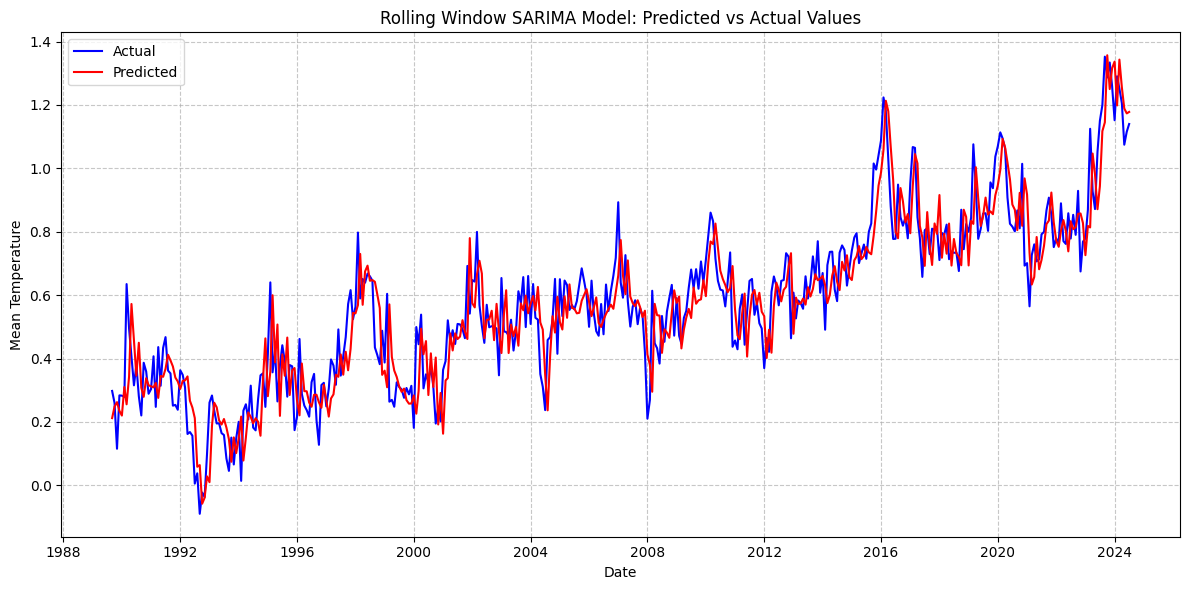

Root Mean Squared Error (RMSE): 0.1123
Mean Absolute Error (MAE): 0.0901
R-squared (R²): 0.8184


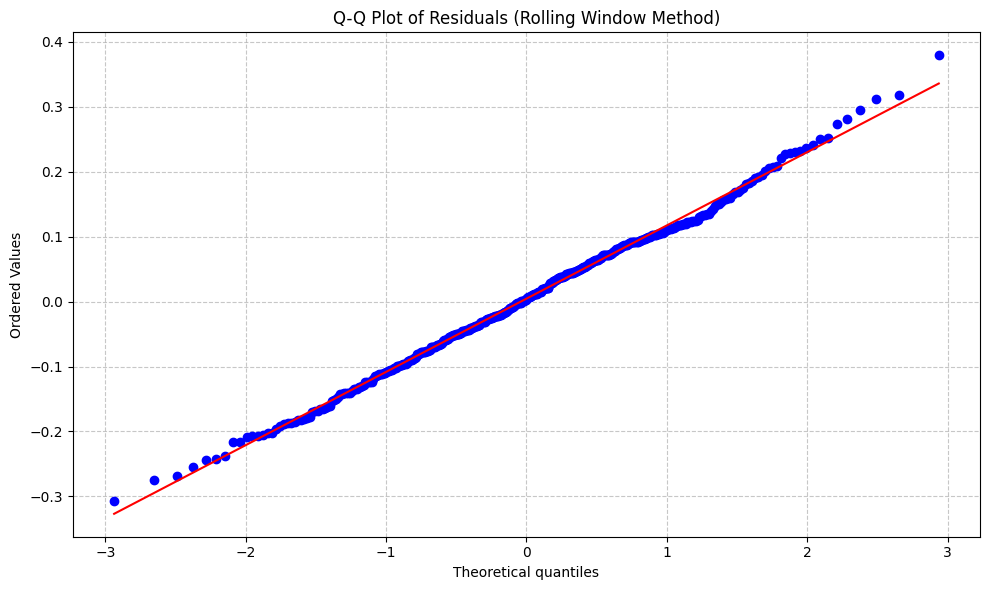

Shapiro-Wilk test for normality (p-value): 0.713804
The residuals follow a normal distribution.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



train_size = int(len(gcag_df) * 0.80)
train_data = gcag_df.iloc[:train_size]
test_data = gcag_df.iloc[train_size:]

# Initialize prediction array
predictions = np.zeros(len(test_data))

# Rolling window size (in months)
window_size = 60  # 5 years of monthly data

# Loop through test set making predictions
for i in range(len(test_data)):
    # Get the rolling window
    if i == 0:
        # First prediction uses only training data
        train_window = train_data.iloc[-window_size:]
    else:
        # Subsequent predictions incorporate new test data points
        end_idx = train_size + i
        start_idx = end_idx - window_size
        train_window = gcag_df.iloc[start_idx:end_idx]

    # Fit the model
    model = SARIMAX(train_window['Mean'],
                   order=(2, 1, 2),
                   seasonal_order=(1, 0, 1, 12),
                   enforce_stationarity=False,
                   enforce_invertibility=False)

    model_fit = model.fit(disp=0)

    # Make one-step ahead forecast
    forecast = model_fit.forecast(steps=1)
    predictions[i] = forecast[0]

    # Print progress
    if i % 10 == 0:
        print(f"Completed {i}/{len(test_data)} predictions")

# Plot test data vs predictions
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Mean'], label='Actual', color='blue')
plt.plot(test_data.index, predictions, label='Predicted', color='red')
plt.title('Rolling Window SARIMA Model: Predicted vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(test_data['Mean'], predictions))
mae = mean_absolute_error(test_data['Mean'], predictions)
r2 = r2_score(test_data['Mean'], predictions)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Check residuals
residuals = test_data['Mean'].values - predictions

# Create Q-Q plot
plt.figure(figsize=(10, 6))
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals (Rolling Window Method)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Test normality
shapiro_test = stats.shapiro(residuals)
print(f"Shapiro-Wilk test for normality (p-value): {shapiro_test[1]:.6f}")
if shapiro_test[1] > 0.05:
    print("The residuals follow a normal distribution.")
else:
    print("The residuals do NOT follow a normal distribution.")

Epoch 1/150
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1913 - val_loss: 0.1488
Epoch 2/150
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0997 - val_loss: 0.1446
Epoch 3/150
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0943 - val_loss: 0.1216
Epoch 4/150
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0897 - val_loss: 0.1334
Epoch 5/150
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0861 - val_loss: 0.1180
Epoch 6/150
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0820 - val_loss: 0.1225
Epoch 7/150
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0792 - val_loss: 0.1413
Epoch 8/150
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0759 - val_loss: 0.1223
Epoch 9/150
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0708 - val_loss: 0.1243
Epoch 10/150
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0659 - val_loss: 0.1386
Epoch 11/150
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0628 - val_loss: 0.1235
Epoch 12/150
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0

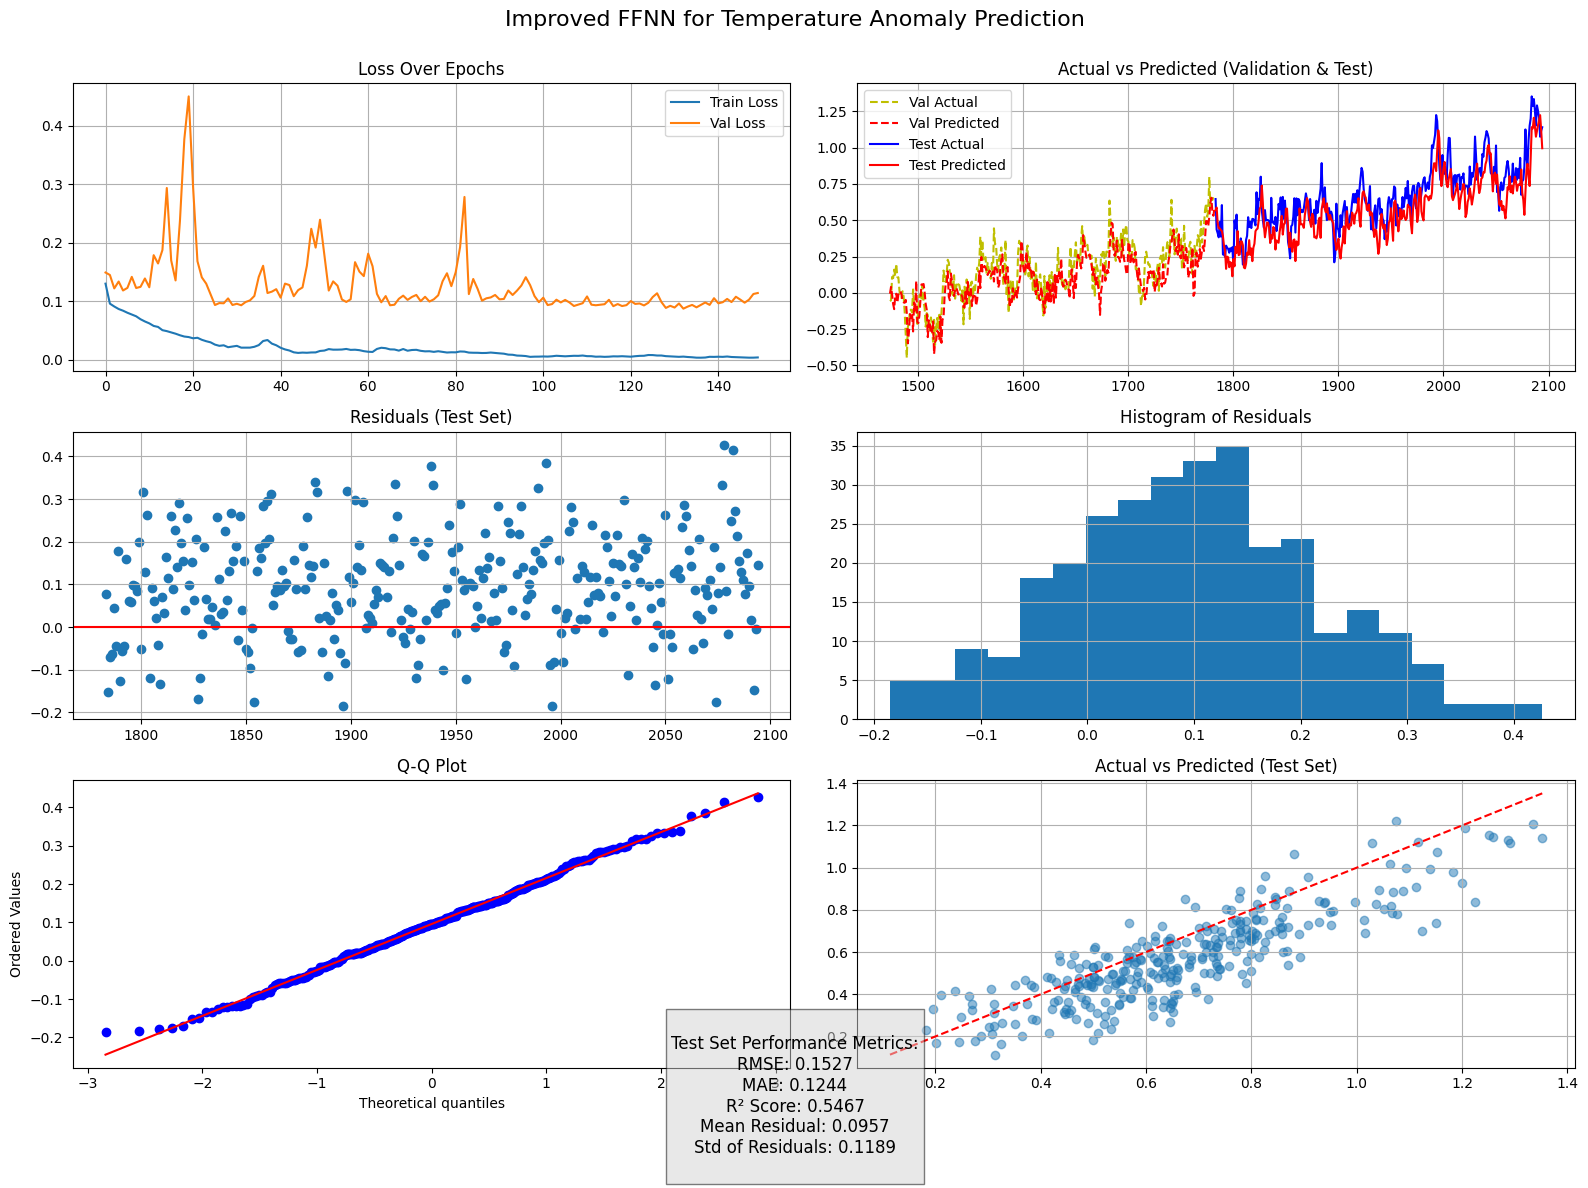


Shapiro-Wilk Test:
W-statistic: 0.9961, p-value: 0.6383
Residuals look normal (fail to reject H0)

Saved results to 'improved_ffnn_results.csv'


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from scipy import stats
import seaborn as sns
import tensorflow as tf

# Set random seeds
np.random.seed(42)
tf.random.set_seed(42)

# Load dataset
data = pd.read_csv('/content/flat-ui__data-Fri Apr 18 2025.csv')
gcag_df = data[data['Source'] == 'gcag'].copy()

# Convert Year to datetime and set as index
gcag_df['Date'] = pd.to_datetime(gcag_df['Year'], format='%Y-%m')
gcag_df = gcag_df.sort_values('Date')
gcag_df = gcag_df.set_index('Date')

# Extract the Mean values for time series analysis
ts = gcag_df['Mean'].values.reshape(-1, 1)

# Normalize using StandardScaler
scaler = StandardScaler()
ts_scaled = scaler.fit_transform(ts)

# Function to create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Parameters
sequence_length = 24
X, y = create_sequences(ts_scaled, sequence_length)

# Flatten input for FFNN
X = X.reshape(X.shape[0], X.shape[1])

# Train-validation-test split (70-15-15)
train_size = int(len(X) * 0.7)
val_size = int(len(X) * 0.15)

X_train = X[:train_size]
y_train = y[:train_size]

X_val = X[train_size:train_size+val_size]
y_val = y[train_size:train_size+val_size]

X_test = X[train_size+val_size:]
y_test = y[train_size+val_size:]

# Model architecture
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(sequence_length,)))
# model.add(BatchNormalization())
# model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# Early stopping
#early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train
history = model.fit(
    X_train, y_train,
    epochs=150,
    batch_size=16,
    validation_data=(X_val, y_val),
    #callbacks=[early_stop],
    verbose=1
)

# Predict
train_predict = model.predict(X_train)
val_predict = model.predict(X_val)
test_predict = model.predict(X_test)

# Inverse transform
train_predict = scaler.inverse_transform(train_predict)
val_predict = scaler.inverse_transform(val_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_val_actual = scaler.inverse_transform(y_val.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Metrics
val_rmse = np.sqrt(mean_squared_error(y_val_actual, val_predict))
val_mae = mean_absolute_error(y_val_actual, val_predict)
val_r2 = r2_score(y_val_actual, val_predict)

test_rmse = np.sqrt(mean_squared_error(y_test_actual, test_predict))
test_mae = mean_absolute_error(y_test_actual, test_predict)
test_r2 = r2_score(y_test_actual, test_predict)

print("\nValidation Set Metrics:")
print(f"RMSE: {val_rmse:.4f}, MAE: {val_mae:.4f}, R²: {val_r2:.4f}")
print("\nTest Set Metrics:")
print(f"RMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R²: {test_r2:.4f}")

# Residuals
residuals = y_test_actual - test_predict

# Indexes for plotting
val_index = np.arange(len(y_val_actual)) + train_size + sequence_length
test_index = np.arange(len(y_test_actual)) + train_size + val_size + sequence_length

# Plotting
plt.figure(figsize=(16, 12))

# Plot 1: Loss
plt.subplot(3, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.grid(True)

# Plot 2: Predictions vs Actual
plt.subplot(3, 2, 2)
plt.plot(val_index, y_val_actual, 'y--', label='Val Actual')
plt.plot(val_index, val_predict, 'r--', label='Val Predicted')
plt.plot(test_index, y_test_actual, 'b', label='Test Actual')
plt.plot(test_index, test_predict, 'r', label='Test Predicted')
plt.title('Actual vs Predicted (Validation & Test)')
plt.legend()
plt.grid(True)

# Plot 3: Residuals over time
plt.subplot(3, 2, 3)
plt.scatter(test_index, residuals)
plt.axhline(y=0, color='r')
plt.title('Residuals (Test Set)')
plt.grid(True)

# Plot 4: Histogram of residuals
plt.subplot(3, 2, 4)
plt.hist(residuals, bins=20)
plt.title('Histogram of Residuals')
plt.grid(True)

# Plot 5: Q-Q plot
plt.subplot(3, 2, 5)
stats.probplot(residuals.flatten(), dist="norm", plot=plt)
plt.title('Q-Q Plot')

# Plot 6: Scatter Actual vs Predicted
plt.subplot(3, 2, 6)
plt.scatter(y_test_actual, test_predict, alpha=0.5)
min_val = min(y_test_actual.min(), test_predict.min())
max_val = max(y_test_actual.max(), test_predict.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')
plt.title('Actual vs Predicted (Test Set)')
plt.grid(True)

# Text summary
metrics_text = f"""
Test Set Performance Metrics:
RMSE: {test_rmse:.4f}
MAE: {test_mae:.4f}
R² Score: {test_r2:.4f}
Mean Residual: {np.mean(residuals):.4f}
Std of Residuals: {np.std(residuals):.4f}
"""
plt.figtext(0.5, 0.01, metrics_text, ha='center', fontsize=12,
            bbox=dict(facecolor='lightgray', alpha=0.5))

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.suptitle('Improved FFNN for Temperature Anomaly Prediction', fontsize=16, y=0.98)
plt.savefig('improved_ffnn_results.png', dpi=300, bbox_inches='tight')
plt.show()

# Normality test
shapiro_test = stats.shapiro(residuals)
print(f"\nShapiro-Wilk Test:")
print(f"W-statistic: {shapiro_test[0]:.4f}, p-value: {shapiro_test[1]:.4f}")
if shapiro_test[1] > 0.05:
    print("Residuals look normal (fail to reject H0)")
else:
    print("Residuals are not normally distributed (reject H0)")

# Save results
results_df = pd.DataFrame({
    'Index': test_index,
    'Actual': y_test_actual.flatten(),
    'Predicted': test_predict.flatten(),
    'Residual': residuals.flatten()
})
results_df.to_csv('improved_ffnn_results.csv', index=False)
print("\nSaved results to 'improved_ffnn_results.csv'")

Training data: 1458 samples
Validation data: 312 samples
Testing data: 313 samples
Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.2210 - val_loss: 0.0283
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0205 - val_loss: 0.0185
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0167 - val_loss: 0.0141
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0150 - val_loss: 0.0127
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0143 - val_loss: 0.0120
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0138 - val_loss: 0.0115
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0134 - val_loss: 0.0110
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0130 - val_loss: 0.0107
Epoch 9/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0126 - val_loss: 0.0104
Epoch 10/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0124 - val_loss: 0.0101
Epoch 11/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0121 - val_lo

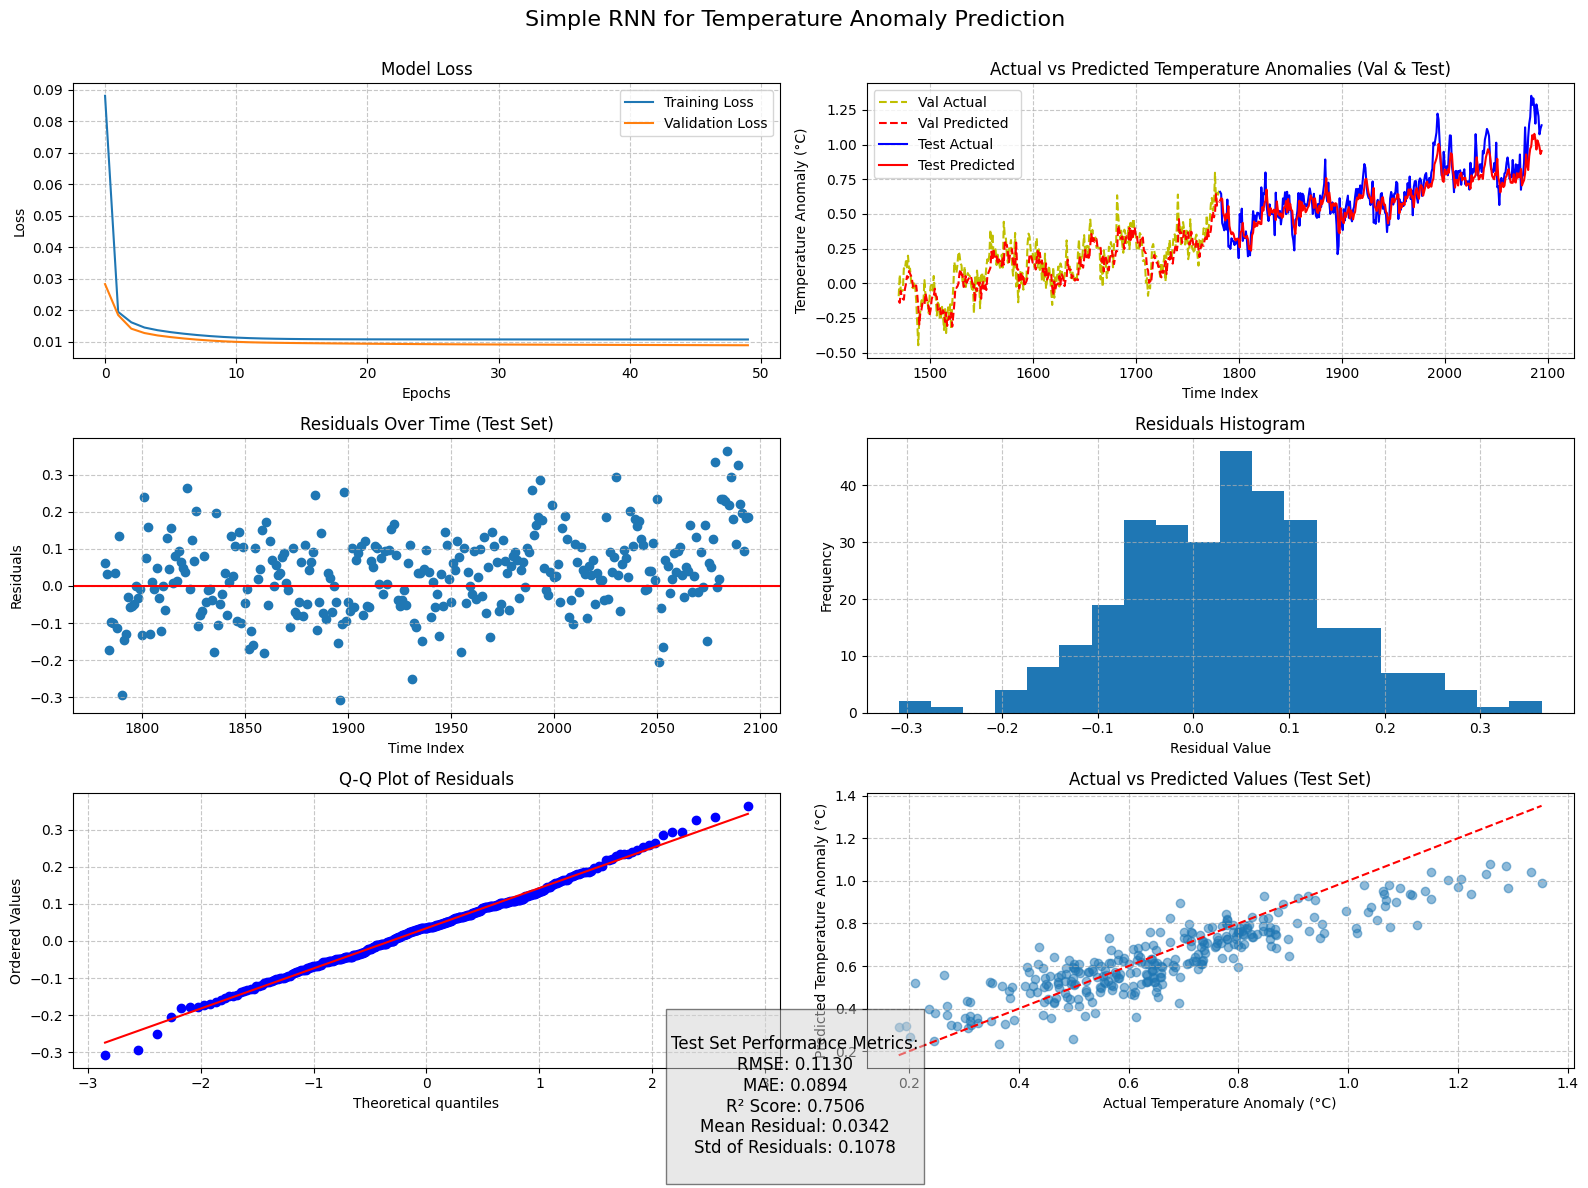


Shapiro-Wilk Test for Normality of Residuals:
W-statistic: 0.9960
p-value: 0.6144
Residuals appear to be normally distributed (fail to reject H0)

Sample of test prediction results:
   Index  Actual  Predicted  Residual
0   1782  0.6591   0.598052  0.061048
1   1783  0.6456   0.613703  0.031897
2   1784  0.4348   0.608105 -0.173305
3   1785  0.4111   0.508708 -0.097608
4   1786  0.3822   0.482466 -0.100266
Results saved to 'simple_rnn_results.csv'


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from scipy import stats
import seaborn as sns
import tensorflow as tf

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load data
data = pd.read_csv('/content/flat-ui__data-Fri Apr 18 2025.csv')
# Filter for GCAG data only
gcag_df = data[data['Source'] == 'gcag'].copy()

# Convert Year to datetime and set as index (assuming Year column is in 'YYYY-MM' format)
gcag_df['Date'] = pd.to_datetime(gcag_df['Year'], format='%Y-%m')
gcag_df = gcag_df.sort_values('Date')
gcag_df = gcag_df.set_index('Date')

# Extract the Mean values for time series analysis
ts = gcag_df['Mean'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(-1, 1))
ts_scaled = scaler.fit_transform(ts)

# Create sequences for RNN
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Parameters
sequence_length = 12  # Using 12 months of data to predict the next month
X, y = create_sequences(ts_scaled, sequence_length)

# Train-validation-test split (70-15-15)
train_size = int(len(X) * 0.7)
val_size = int(len(X) * 0.15)

X_train = X[:train_size]
y_train = y[:train_size]

X_val = X[train_size:train_size+val_size]
y_val = y[train_size:train_size+val_size]

X_test = X[train_size+val_size:]
y_test = y[train_size+val_size:]

print(f"Training data: {X_train.shape[0]} samples")
print(f"Validation data: {X_val.shape[0]} samples")
print(f"Testing data: {X_test.shape[0]} samples")

# Build RNN model
model = Sequential()
model.add(SimpleRNN(50, activation='tanh', return_sequences=False, input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse') # default learning rate 0.001

# Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

# Make predictions
train_predict = model.predict(X_train)
val_predict = model.predict(X_val)
test_predict = model.predict(X_test)

# Inverse transform to original scale
train_predict = scaler.inverse_transform(train_predict)
val_predict = scaler.inverse_transform(val_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_val_actual = scaler.inverse_transform(y_val.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate error metrics for validation and test sets
val_rmse = np.sqrt(mean_squared_error(y_val_actual, val_predict))
val_mae = mean_absolute_error(y_val_actual, val_predict)
val_r2 = r2_score(y_val_actual, val_predict)

test_rmse = np.sqrt(mean_squared_error(y_test_actual, test_predict))
test_mae = mean_absolute_error(y_test_actual, test_predict)
test_r2 = r2_score(y_test_actual, test_predict)

print("\nValidation Set Metrics:")
print(f"Root Mean Squared Error (RMSE): {val_rmse:.4f}")
print(f"Mean Absolute Error (MAE): {val_mae:.4f}")
print(f"R-squared (R²): {val_r2:.4f}")

print("\nTest Set Metrics:")
print(f"Root Mean Squared Error (RMSE): {test_rmse:.4f}")
print(f"Mean Absolute Error (MAE): {test_mae:.4f}")
print(f"R-squared (R²): {test_r2:.4f}")

# Calculate residuals for test set
residuals = y_test_actual - test_predict

# Create time indices for plotting
val_index = np.arange(len(y_val_actual)) + train_size + sequence_length
test_index = np.arange(len(y_test_actual)) + train_size + val_size + sequence_length

# Plotting
plt.figure(figsize=(16, 12))

# Plot 1: Training and Validation Loss
plt.subplot(3, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Plot 2: Actual vs Predicted on Validation and Test Sets Only
plt.subplot(3, 2, 2)
plt.plot(val_index, y_val_actual, 'y--', label='Val Actual')
plt.plot(val_index, val_predict, 'r--', label='Val Predicted')
plt.plot(test_index, y_test_actual, 'b', label='Test Actual')
plt.plot(test_index, test_predict, 'r', label='Test Predicted')
plt.title('Actual vs Predicted Temperature Anomalies (Val & Test)')
plt.xlabel('Time Index')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Plot 3: Residuals Over Time (Test Set)
plt.subplot(3, 2, 3)
plt.scatter(test_index, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuals Over Time (Test Set)')
plt.xlabel('Time Index')
plt.ylabel('Residuals')
plt.grid(True, linestyle='--', alpha=0.7)

# Plot 4: Residuals Histogram
plt.subplot(3, 2, 4)
plt.hist(residuals, bins=20)
plt.title('Residuals Histogram')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)

# Plot 5: Q-Q Plot of Residuals
plt.subplot(3, 2, 5)
stats.probplot(residuals.flatten(), dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.grid(True, linestyle='--', alpha=0.7)

# Plot 6: Scatter plot of Actual vs Predicted (Test Set)
plt.subplot(3, 2, 6)
plt.scatter(y_test_actual, test_predict, alpha=0.5)
min_val = min(y_test_actual.min(), test_predict.min())
max_val = max(y_test_actual.max(), test_predict.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')
plt.title('Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Temperature Anomaly (°C)')
plt.ylabel('Predicted Temperature Anomaly (°C)')
plt.grid(True, linestyle='--', alpha=0.7)

# Add text box with metrics
metrics_text = f"""
Test Set Performance Metrics:
RMSE: {test_rmse:.4f}
MAE: {test_mae:.4f}
R² Score: {test_r2:.4f}
Mean Residual: {np.mean(residuals):.4f}
Std of Residuals: {np.std(residuals):.4f}
"""
plt.figtext(0.5, 0.01, metrics_text, ha='center', fontsize=12,
            bbox=dict(facecolor='lightgray', alpha=0.5))

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.suptitle('Simple RNN for Temperature Anomaly Prediction', fontsize=16, y=0.98)
plt.savefig('rnn_time_series_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Additional residual analysis: Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(residuals)
print(f"\nShapiro-Wilk Test for Normality of Residuals:")
print(f"W-statistic: {shapiro_test[0]:.4f}")
print(f"p-value: {shapiro_test[1]:.4f}")
if shapiro_test[1] > 0.05:
    print("Residuals appear to be normally distributed (fail to reject H0)")
else:
    print("Residuals do not appear to be normally distributed (reject H0)")

# Create and save DataFrame with results
results_df = pd.DataFrame({
    'Index': test_index,
    'Actual': y_test_actual.flatten(),
    'Predicted': test_predict.flatten(),
    'Residual': residuals.flatten()
})

print("\nSample of test prediction results:")
print(results_df.head())

# Save results to CSV
results_df.to_csv('simple_rnn_results.csv', index=False)
print("Results saved to 'simple_rnn_results.csv'")

Training set size: 1424 sequences
Validation set size: 305 sequences
Testing set size: 306 sequences


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 13s 93ms/step - loss: 0.0207 - val_loss: 0.0049
Epoch 2/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - loss: 0.0060 - val_loss: 0.0052
Epoch 3/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - loss: 0.0056 - val_loss: 0.0037
Epoch 4/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - loss: 0.0053 - val_loss: 0.0033
Epoch 5/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - loss: 0.0053 - val_loss: 0.0032
Epoch 6/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - loss: 0.0048 - val_loss: 0.0030
Epoch 7/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - loss: 0.0050 - val_loss: 0.0029
Epoch 8/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - loss: 0.0049 - val_loss: 0.0027
Epoch 9/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - loss: 0.0047 - val_loss: 0.0026
Epoch 10/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - loss: 0.0044 - val_loss: 0.0025
Epoch 11/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - loss: 0.0042 - val_loss: 0.0024
Epoch 12/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 

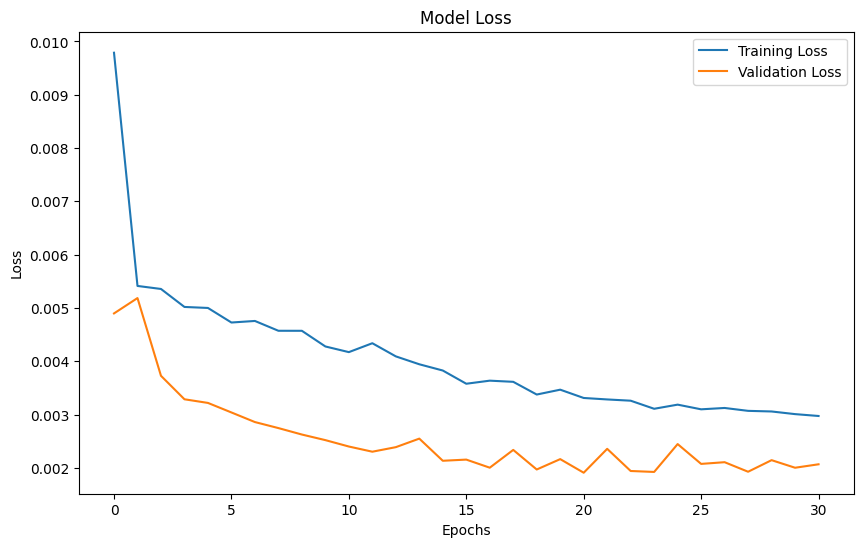

45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step

Model Performance Metrics:
Training Set - RMSE: 0.1304, MAE: 0.0984, R²: 0.6252
Validation Set - RMSE: 0.1048, MAE: 0.0819, R²: 0.7407
Testing Set - RMSE: 0.0995, MAE: 0.0796, R²: 0.8073


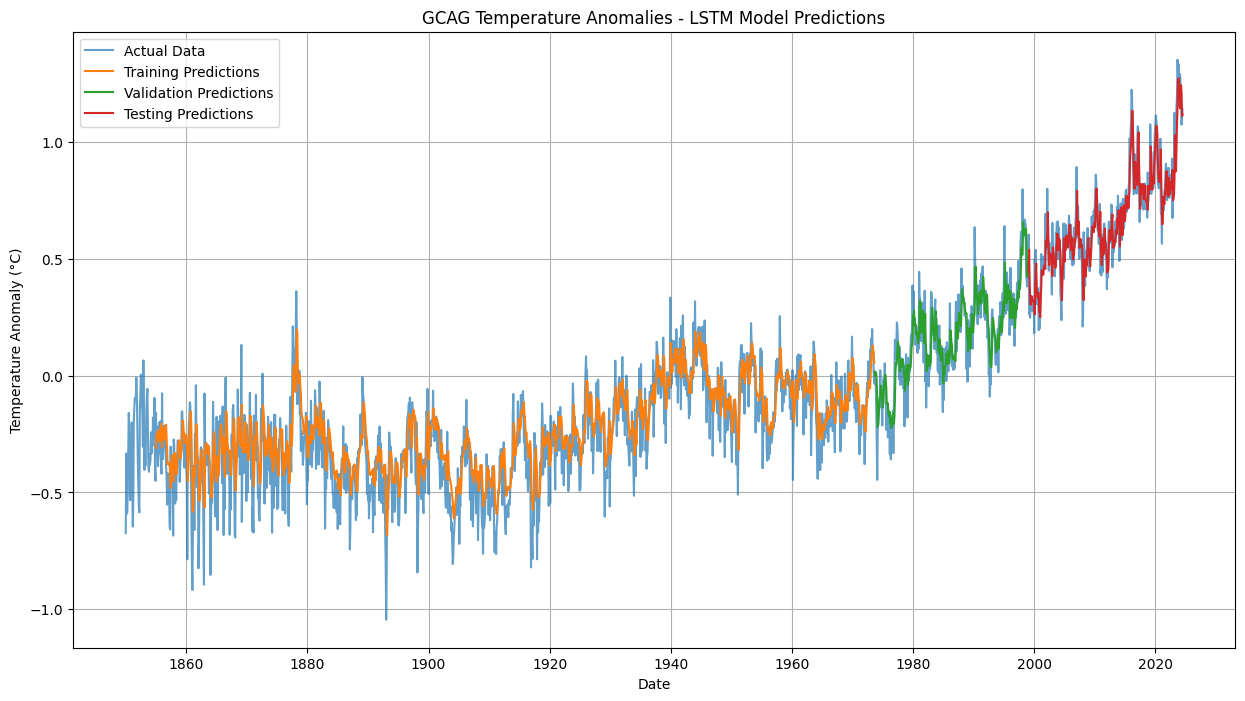

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import math
import tensorflow as tf
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)


# Step 1: Load and preprocess the data
df = pd.read_csv('/content/flat-ui__data-Fri Apr 18 2025.csv')

# Filter to only include GCAG data
df_gcag = df[df['Source'] == 'gcag'].copy()

# Convert the Year column to datetime
df_gcag['Date'] = pd.to_datetime(df_gcag['Year'], format='%Y-%m')
df_gcag.set_index('Date', inplace=True)
df_gcag.sort_index(inplace=True)

# Step 2: Prepare data for LSTM
data = df_gcag['Mean'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

# Create sequences for LSTM input
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length, 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

# Define sequence length (number of months to look back)
seq_length = 60

# Create sequences
X, y = create_sequences(data_normalized, seq_length)

# Reshape X to match LSTM input format [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Step 3: Split into train, validation, and test sets (70-15-15)
train_size = int(len(X) * 0.7)
val_size = int(len(X) * 0.15)
test_size = len(X) - train_size - val_size

X_train, X_val, X_test = X[:train_size], X[train_size:train_size+val_size], X[train_size+val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size+val_size], y[train_size+val_size:]

print(f"Training set size: {X_train.shape[0]} sequences")
print(f"Validation set size: {X_val.shape[0]} sequences")
print(f"Testing set size: {X_test.shape[0]} sequences")

# Step 4: Build LSTM model
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=32))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
learning_rate = 0.001  # Define your desired learning rate
optimizer = Adam(learning_rate=learning_rate)  # Create an Adam optimizer with the learning rate
model.compile(optimizer=optimizer, loss='mean_squared_error')
# Define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Step 5: Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_data=(X_val, y_val),
    callbacks=[early_stop],
    verbose=1
)

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Step 6: Evaluate the model
train_predict = model.predict(X_train)
val_predict = model.predict(X_val)
test_predict = model.predict(X_test)

# Inverse transform predictions to original scale
train_predict = scaler.inverse_transform(train_predict)
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))

val_predict = scaler.inverse_transform(val_predict)
y_val_inv = scaler.inverse_transform(y_val.reshape(-1, 1))

test_predict = scaler.inverse_transform(test_predict)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate metrics: RMSE, MAE, R²
def calculate_metrics(actual, predicted):
    rmse = math.sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)
    r2 = r2_score(actual, predicted)
    return rmse, mae, r2

train_rmse, train_mae, train_r2 = calculate_metrics(y_train_inv, train_predict)
val_rmse, val_mae, val_r2 = calculate_metrics(y_val_inv, val_predict)
test_rmse, test_mae, test_r2 = calculate_metrics(y_test_inv, test_predict)

print("\nModel Performance Metrics:")
print(f"Training Set - RMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R²: {train_r2:.4f}")
print(f"Validation Set - RMSE: {val_rmse:.4f}, MAE: {val_mae:.4f}, R²: {val_r2:.4f}")
print(f"Testing Set - RMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R²: {test_r2:.4f}")

# Step 7: Plot results with all three data splits
# Create base plot array
train_plot = np.empty_like(data)
train_plot[:, :] = np.nan
val_plot = np.empty_like(data)
val_plot[:, :] = np.nan
test_plot = np.empty_like(data)
test_plot[:, :] = np.nan

# Fill with predictions (accounting for sequence length offset)
train_plot[seq_length:len(train_predict) + seq_length, :] = train_predict
val_plot[len(train_predict) + seq_length:len(train_predict) + len(val_predict) + seq_length, :] = val_predict
test_plot[len(train_predict) + len(val_predict) + seq_length:len(data), :] = test_predict

# Plot actual vs predictions
plt.figure(figsize=(15, 8))
plt.plot(df_gcag.index, data, label='Actual Data', alpha=0.7)
plt.plot(df_gcag.index, train_plot, label='Training Predictions')
plt.plot(df_gcag.index, val_plot, label='Validation Predictions')
plt.plot(df_gcag.index, test_plot, label='Testing Predictions')
plt.title('GCAG Temperature Anomalies - LSTM Model Predictions')
plt.xlabel('Date')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend()
plt.grid(True)
plt.show()



Training data: 1458 samples
Validation data: 312 samples
Testing data: 313 samples


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_5 (GRU)                     │ (None, 12, 50)         │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_6 (GRU)                     │ (None, 12, 50)         │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_7 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,601 (150.79 KB)

 Trainable params: 38,601 (150.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.0419 - val_loss: 0.0198
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0141 - val_loss: 0.0127
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0137 - val_loss: 0.0126
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0131 - val_loss: 0.0117
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0125 - val_loss: 0.0108
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0119 - val_loss: 0.0101
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0116 - val_loss: 0.0098
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0116 - val_loss: 0.0097
Epoch 9/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0116 - val_loss: 0.0096
Epoch 10/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0115 - val_loss: 0.0095
Epoch 11/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0115 - val_loss: 0.0095
Epoch 12/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/ste

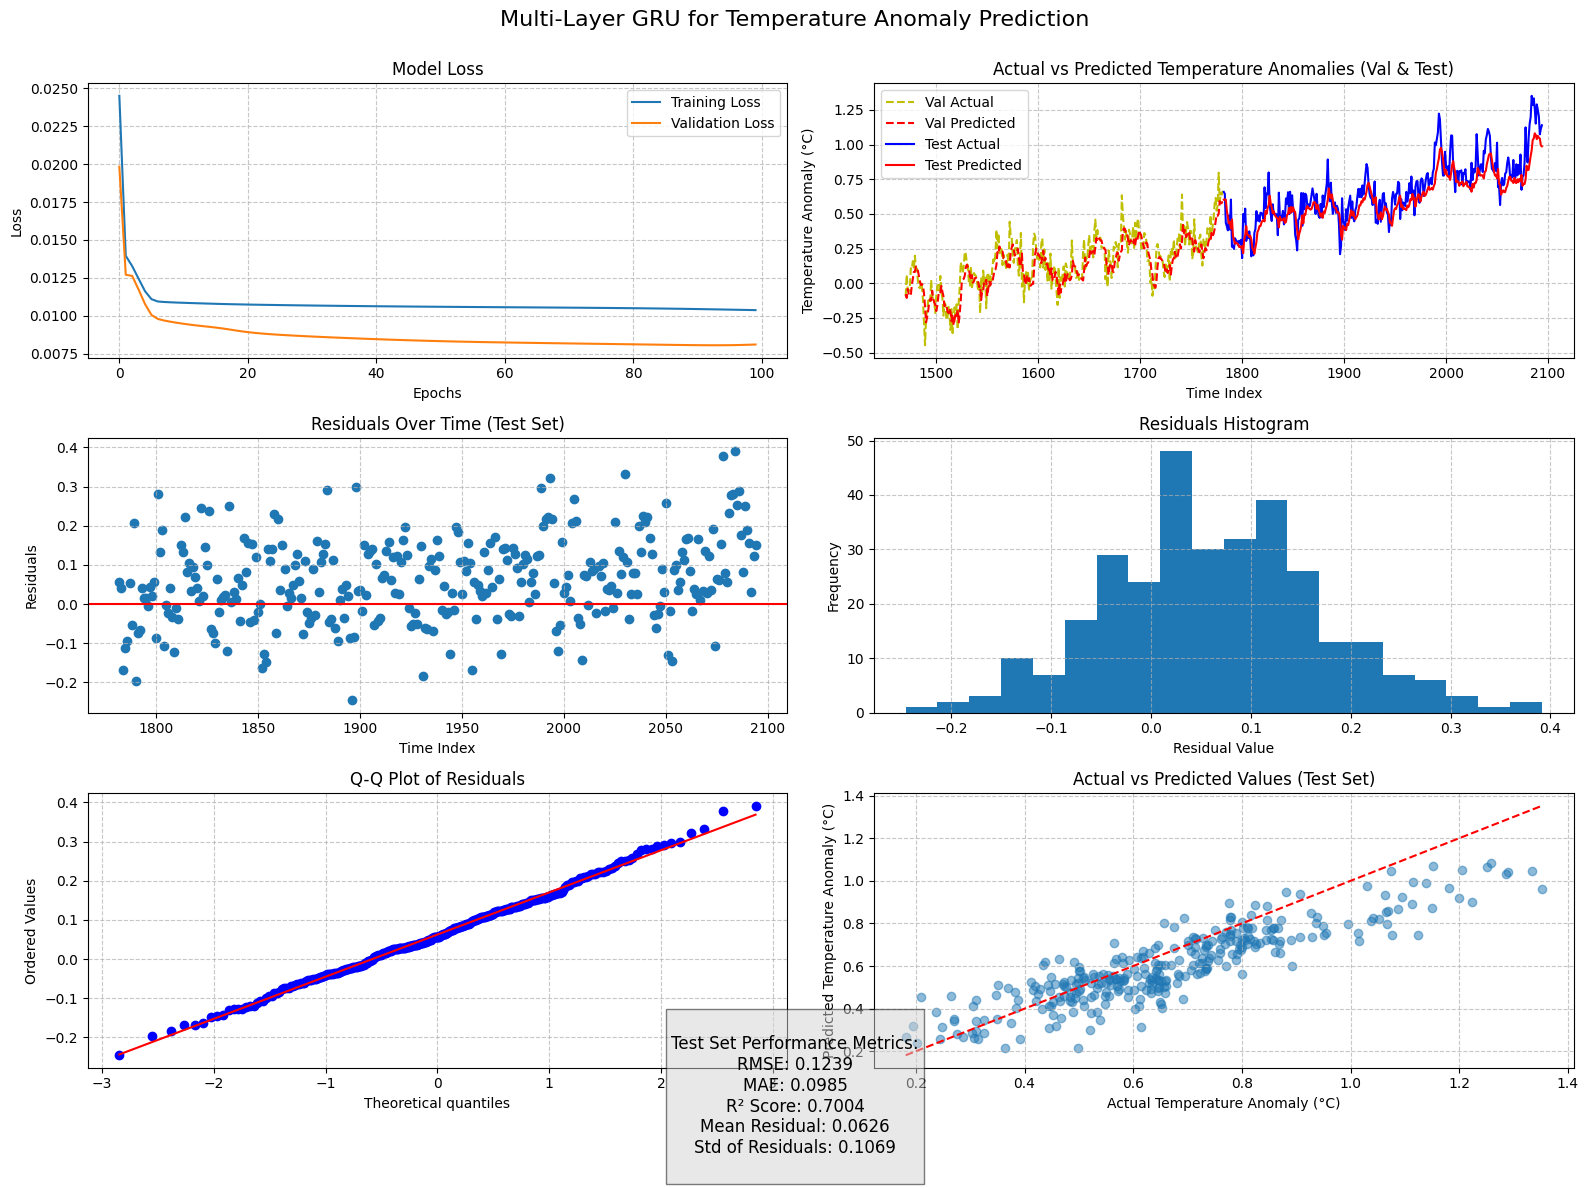


Shapiro-Wilk Test for Normality of Residuals:
W-statistic: 0.9970
p-value: 0.8269
Residuals appear to be normally distributed (fail to reject H0)

Sample of test prediction results:
   Index  Actual  Predicted  Residual
0   1782  0.6591   0.603338  0.055762
1   1783  0.6456   0.605693  0.039907
2   1784  0.4348   0.603104 -0.168304
3   1785  0.4111   0.522981 -0.111881
4   1786  0.3822   0.477340 -0.095140
Results saved to 'multilayer_gru_results.csv'


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from scipy import stats
import seaborn as sns
import tensorflow as tf

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load data
data = pd.read_csv('/content/flat-ui__data-Fri Apr 18 2025.csv')
gcag_df = data[data['Source'] == 'gcag'].copy()

# Convert Year to datetime and set as index
gcag_df['Date'] = pd.to_datetime(gcag_df['Year'], format='%Y-%m')
gcag_df = gcag_df.sort_values('Date')
gcag_df = gcag_df.set_index('Date')

# Extract the Mean values for time series analysis
ts = gcag_df['Mean'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(-1, 1))
ts_scaled = scaler.fit_transform(ts)

# Create sequences for GRU
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Parameters
sequence_length = 12  # Using 12 months of data to predict the next month
X, y = create_sequences(ts_scaled, sequence_length)

# Train-validation-test split (70-15-15)
train_size = int(len(X) * 0.7)
val_size = int(len(X) * 0.15)

X_train = X[:train_size]
y_train = y[:train_size]

X_val = X[train_size:train_size+val_size]
y_val = y[train_size:train_size+val_size]

X_test = X[train_size+val_size:]
y_test = y[train_size+val_size:]

print(f"Training data: {X_train.shape[0]} samples")
print(f"Validation data: {X_val.shape[0]} samples")
print(f"Testing data: {X_test.shape[0]} samples")

# Build multi-layer GRU model
model = Sequential()
# First GRU layer with return_sequences=True to feed into next GRU layer
model.add(GRU(50, activation='tanh', return_sequences=True, input_shape=(sequence_length, 1)))
#model.add(Dropout(0.2))
# Second GRU layer
model.add(GRU(50, activation='tanh', return_sequences=True))
#model.add(Dropout(0.2))
# Third GRU layer
model.add(GRU(50, activation='tanh', return_sequences=False))
#model.add(Dropout(0.2))
# Output layer
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.summary()  # Display model architecture

# Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

# Make predictions
train_predict = model.predict(X_train)
val_predict = model.predict(X_val)
test_predict = model.predict(X_test)

# Inverse transform to original scale
train_predict = scaler.inverse_transform(train_predict)
val_predict = scaler.inverse_transform(val_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_val_actual = scaler.inverse_transform(y_val.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate error metrics for validation and test sets
val_rmse = np.sqrt(mean_squared_error(y_val_actual, val_predict))
val_mae = mean_absolute_error(y_val_actual, val_predict)
val_r2 = r2_score(y_val_actual, val_predict)

test_rmse = np.sqrt(mean_squared_error(y_test_actual, test_predict))
test_mae = mean_absolute_error(y_test_actual, test_predict)
test_r2 = r2_score(y_test_actual, test_predict)

print("\nValidation Set Metrics:")
print(f"Root Mean Squared Error (RMSE): {val_rmse:.4f}")
print(f"Mean Absolute Error (MAE): {val_mae:.4f}")
print(f"R-squared (R²): {val_r2:.4f}")

print("\nTest Set Metrics:")
print(f"Root Mean Squared Error (RMSE): {test_rmse:.4f}")
print(f"Mean Absolute Error (MAE): {test_mae:.4f}")
print(f"R-squared (R²): {test_r2:.4f}")

# Calculate residuals for test set
residuals = y_test_actual - test_predict

# Create time indices for plotting
val_index = np.arange(len(y_val_actual)) + train_size + sequence_length
test_index = np.arange(len(y_test_actual)) + train_size + val_size + sequence_length

# Plotting
plt.figure(figsize=(16, 12))

# Plot 1: Training and Validation Loss
plt.subplot(3, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Plot 2: Actual vs Predicted on Validation and Test Sets Only
plt.subplot(3, 2, 2)
plt.plot(val_index, y_val_actual, 'y--', label='Val Actual')
plt.plot(val_index, val_predict, 'r--', label='Val Predicted')
plt.plot(test_index, y_test_actual, 'b', label='Test Actual')
plt.plot(test_index, test_predict, 'r', label='Test Predicted')
plt.title('Actual vs Predicted Temperature Anomalies (Val & Test)')
plt.xlabel('Time Index')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Plot 3: Residuals Over Time (Test Set)
plt.subplot(3, 2, 3)
plt.scatter(test_index, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuals Over Time (Test Set)')
plt.xlabel('Time Index')
plt.ylabel('Residuals')
plt.grid(True, linestyle='--', alpha=0.7)

# Plot 4: Residuals Histogram
plt.subplot(3, 2, 4)
plt.hist(residuals, bins=20)
plt.title('Residuals Histogram')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)

# Plot 5: Q-Q Plot of Residuals
plt.subplot(3, 2, 5)
stats.probplot(residuals.flatten(), dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.grid(True, linestyle='--', alpha=0.7)

# Plot 6: Scatter plot of Actual vs Predicted (Test Set)
plt.subplot(3, 2, 6)
plt.scatter(y_test_actual, test_predict, alpha=0.5)
min_val = min(y_test_actual.min(), test_predict.min())
max_val = max(y_test_actual.max(), test_predict.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')
plt.title('Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Temperature Anomaly (°C)')
plt.ylabel('Predicted Temperature Anomaly (°C)')
plt.grid(True, linestyle='--', alpha=0.7)

# Add text box with metrics
metrics_text = f"""
Test Set Performance Metrics:
RMSE: {test_rmse:.4f}
MAE: {test_mae:.4f}
R² Score: {test_r2:.4f}
Mean Residual: {np.mean(residuals):.4f}
Std of Residuals: {np.std(residuals):.4f}
"""
plt.figtext(0.5, 0.01, metrics_text, ha='center', fontsize=12,
            bbox=dict(facecolor='lightgray', alpha=0.5))

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.suptitle('Multi-Layer GRU for Temperature Anomaly Prediction', fontsize=16, y=0.98)
plt.savefig('multilayer_gru_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Additional residual analysis: Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(residuals)
print(f"\nShapiro-Wilk Test for Normality of Residuals:")
print(f"W-statistic: {shapiro_test[0]:.4f}")
print(f"p-value: {shapiro_test[1]:.4f}")
if shapiro_test[1] > 0.05:
    print("Residuals appear to be normally distributed (fail to reject H0)")
else:
    print("Residuals do not appear to be normally distributed (reject H0)")

# Create and save DataFrame with results
results_df = pd.DataFrame({
    'Index': test_index,
    'Actual': y_test_actual.flatten(),
    'Predicted': test_predict.flatten(),
    'Residual': residuals.flatten()
})

print("\nSample of test prediction results:")
print(results_df.head())

# Save results to CSV
results_df.to_csv('multilayer_gru_results.csv', index=False)
print("Results saved to 'multilayer_gru_results.csv'")

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 12s 73ms/step - loss: 0.0246 - val_loss: 0.0068
Epoch 2/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - loss: 0.0066 - val_loss: 0.0029
Epoch 3/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - loss: 0.0055 - val_loss: 0.0038
Epoch 4/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - loss: 0.0049 - val_loss: 0.0027
Epoch 5/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 0.0055 - val_loss: 0.0049
Epoch 6/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 11s 73ms/step - loss: 0.0045 - val_loss: 0.0030
Epoch 7/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - loss: 0.0046 - val_loss: 0.0029
Epoch 8/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - loss: 0.0041 - val_loss: 0.0023
Epoch 9/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - loss: 0.0042 - val_loss: 0.0024
Epoch 10/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - loss: 0.0041 - val_loss: 0.0032
Epoch 11/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - loss: 0.0037 - val_loss: 0.0023
Epoch 12/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 11s 73ms/step - 

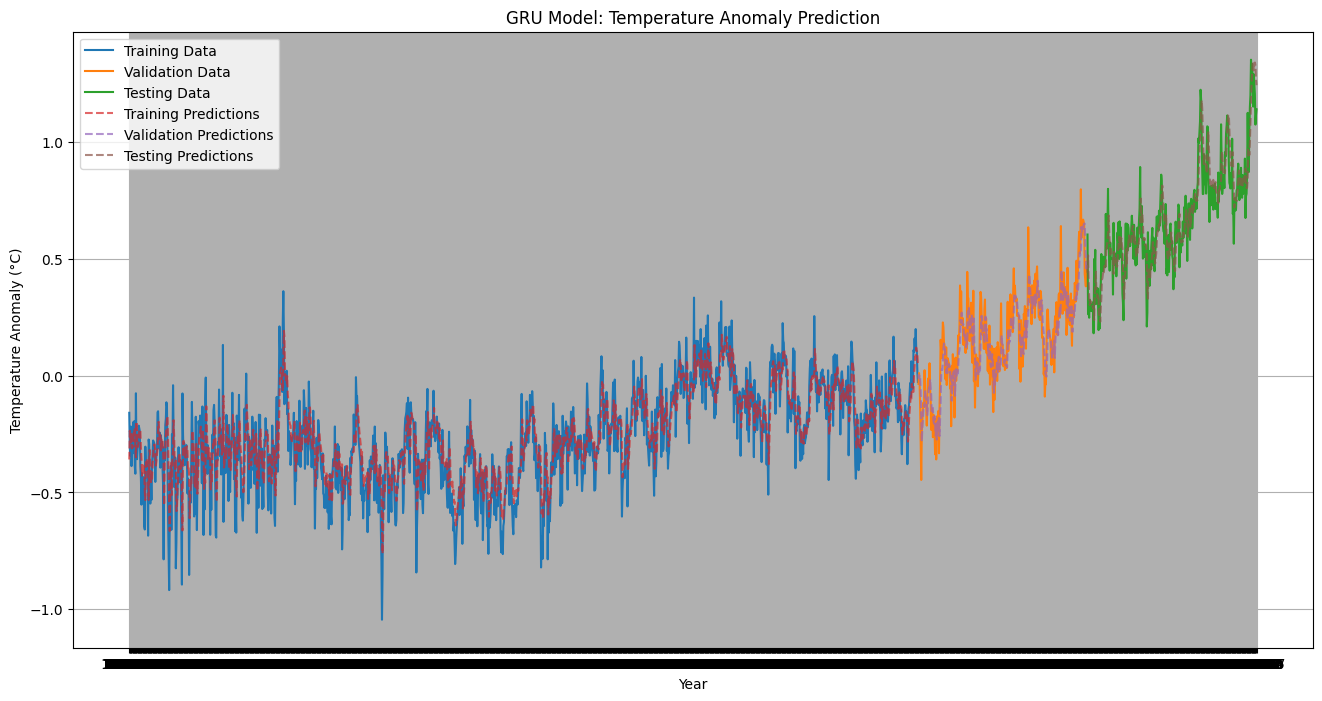

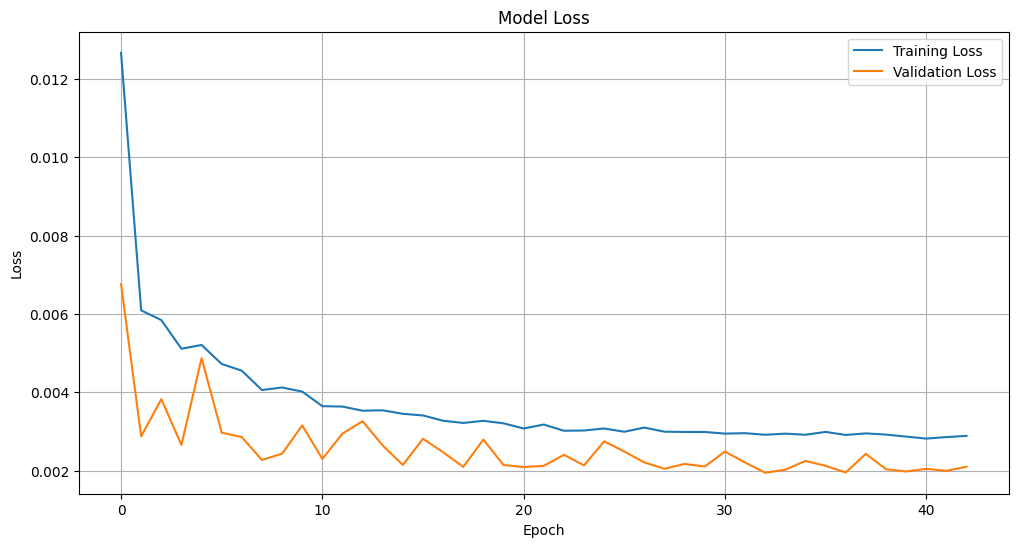

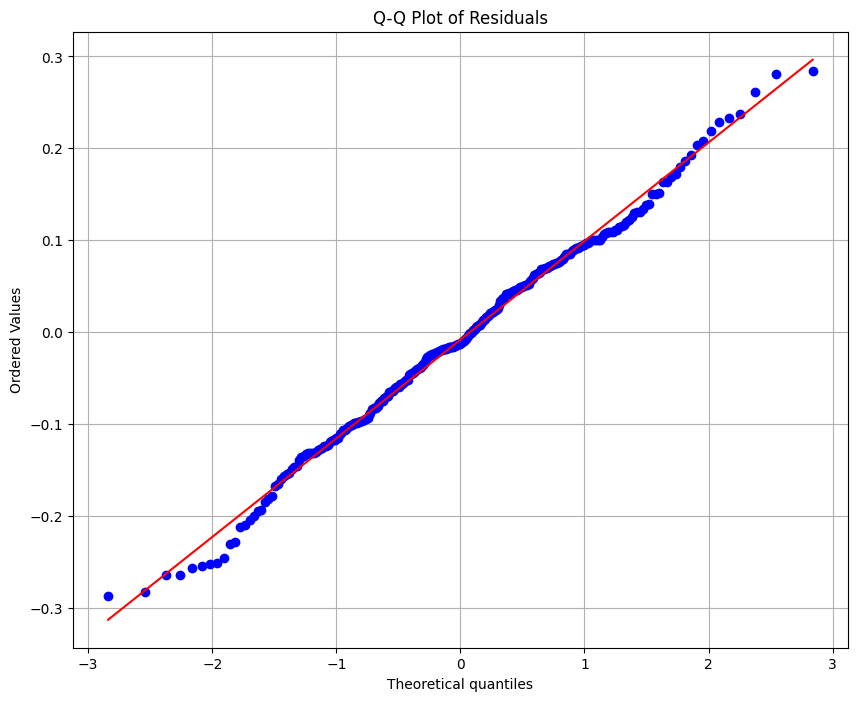

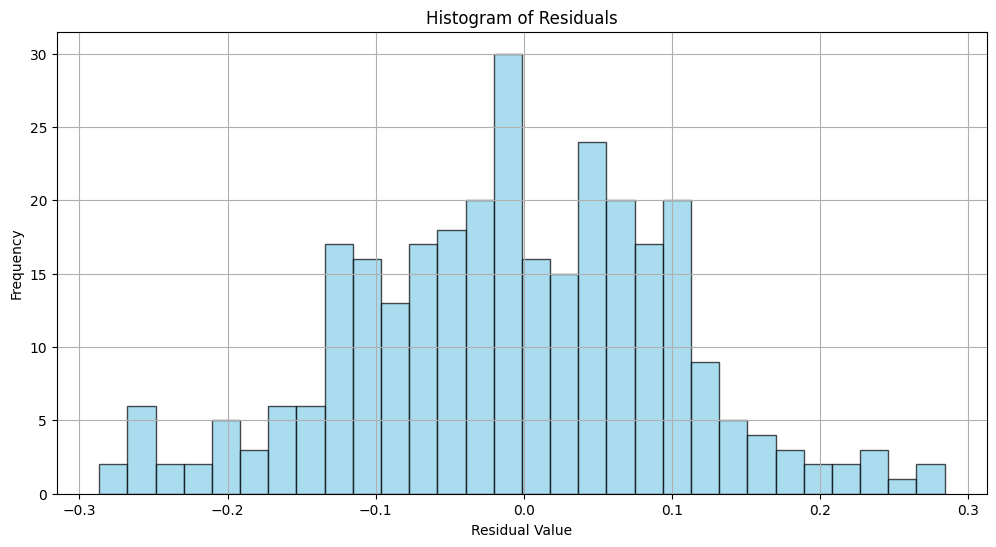

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import scipy.stats as stats

# 1. Load and preprocess data
df = pd.read_csv('/content/flat-ui__data-Fri Apr 18 2025.csv')

# Filter for GCAG source
gcag_data = df[df['Source'] == 'gcag']
gcag_data = gcag_data.sort_values('Year')  # Ensure chronological ordering

# Extract features and target
data = gcag_data['Mean'].values.reshape(-1, 1)

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# 2. Create sequences for the GRU model
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Use 12 time steps as lookback window
seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

# 3. Split data into 70-15-15 train-validation-test
train_size = int(len(X) * 0.7)
val_size = int(len(X) * 0.15)

X_train, X_val, X_test = X[:train_size], X[train_size:train_size+val_size], X[train_size+val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size+val_size], y[train_size+val_size:]

# 4. Build the GRU model
model = Sequential([
    GRU(64, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    GRU(32, return_sequences=True),
    Dropout(0.2),
    GRU(16),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# 5. Train the model with early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_data=(X_val, y_val),
    callbacks=[early_stop],
    verbose=1
)

# 6. Evaluate the model
train_predict = model.predict(X_train)
val_predict = model.predict(X_val)
test_predict = model.predict(X_test)

# Inverse transform predictions to original scale
train_predict = scaler.inverse_transform(train_predict)
y_train_inv = scaler.inverse_transform(y_train)
val_predict = scaler.inverse_transform(val_predict)
y_val_inv = scaler.inverse_transform(y_val)
test_predict = scaler.inverse_transform(test_predict)
y_test_inv = scaler.inverse_transform(y_test)

# 7. Calculate metrics: RMSE, MAE, R2
# Training metrics
train_rmse = np.sqrt(mean_squared_error(y_train_inv, train_predict))
train_mae = mean_absolute_error(y_train_inv, train_predict)
train_r2 = r2_score(y_train_inv, train_predict)

# Validation metrics
val_rmse = np.sqrt(mean_squared_error(y_val_inv, val_predict))
val_mae = mean_absolute_error(y_val_inv, val_predict)
val_r2 = r2_score(y_val_inv, val_predict)

# Testing metrics
test_rmse = np.sqrt(mean_squared_error(y_test_inv, test_predict))
test_mae = mean_absolute_error(y_test_inv, test_predict)
test_r2 = r2_score(y_test_inv, test_predict)

# Print all metrics
print("Training Metrics:")
print(f'RMSE: {train_rmse:.4f}')
print(f'MAE: {train_mae:.4f}')
print(f'R²: {train_r2:.4f}')

print("\nValidation Metrics:")
print(f'RMSE: {val_rmse:.4f}')
print(f'MAE: {val_mae:.4f}')
print(f'R²: {val_r2:.4f}')

print("\nTesting Metrics:")
print(f'RMSE: {test_rmse:.4f}')
print(f'MAE: {test_mae:.4f}')
print(f'R²: {test_r2:.4f}')

# 8. Visualize results
plt.figure(figsize=(16, 8))

# Calculate indices for plotting
train_end_idx = train_size + seq_length
val_end_idx = train_end_idx + val_size

# Original data indices
train_data_indices = np.arange(seq_length, train_end_idx)
val_data_indices = np.arange(train_end_idx, val_end_idx)
test_data_indices = np.arange(val_end_idx, len(scaled_data))

# Plot original data
plt.plot(gcag_data['Year'].iloc[train_data_indices],
         scaler.inverse_transform(scaled_data)[train_data_indices],
         label='Training Data')
plt.plot(gcag_data['Year'].iloc[val_data_indices],
         scaler.inverse_transform(scaled_data)[val_data_indices],
         label='Validation Data')
plt.plot(gcag_data['Year'].iloc[test_data_indices],
         scaler.inverse_transform(scaled_data)[test_data_indices],
         label='Testing Data')

# Plot predictions
plt.plot(gcag_data['Year'].iloc[train_data_indices], train_predict,
         label='Training Predictions', linestyle='--', alpha=0.7)
plt.plot(gcag_data['Year'].iloc[val_data_indices], val_predict,
         label='Validation Predictions', linestyle='--', alpha=0.7)
plt.plot(gcag_data['Year'].iloc[test_data_indices], test_predict,
         label='Testing Predictions', linestyle='--', alpha=0.7)

plt.title('GRU Model: Temperature Anomaly Prediction')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend()
plt.grid(True)
plt.show()

# 9. Plot loss history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# 10. Calculate residuals and create Q-Q plot
residuals = y_test_inv - test_predict

plt.figure(figsize=(10, 8))
# Q-Q plot
stats.probplot(residuals.flatten(), dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.grid(True)
plt.show()

# 11. Histogram of residuals (additional visualization)
plt.figure(figsize=(12, 6))
plt.hist(residuals, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1779
Model:                 ARIMA(0, 0, 2)   Log Likelihood                1202.027
Date:                Sun, 20 Apr 2025   AIC                          -2396.054
Time:                        15:54:44   BIC                          -2374.119
Sample:                             0   HQIC                         -2387.952
                               - 1779                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.001      0.581      0.561      -0.002       0.003
ma.L1         -0.4583      0.020    -23.191      0.000      -0.497      -0.420
ma.L2         -0.1663      0.022     -7.461      0.0

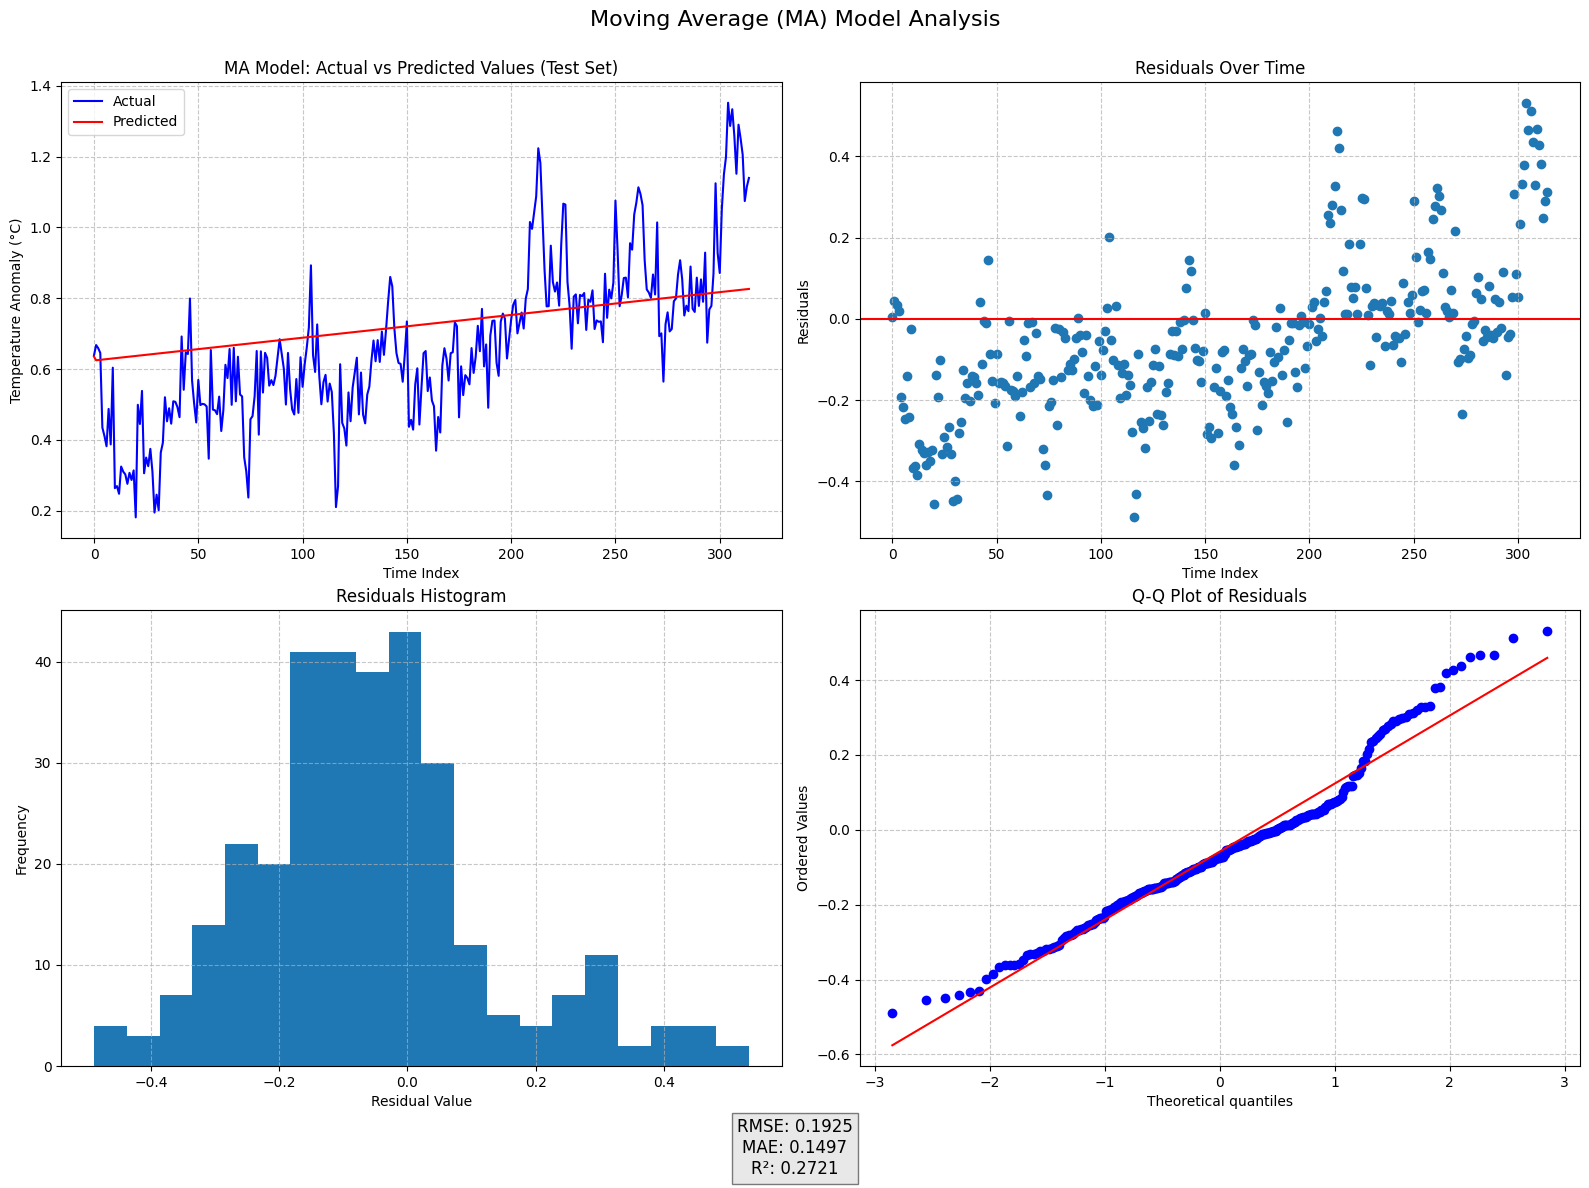

Shapiro-Wilk Test for Normality of Residuals:
W-statistic: 0.9652
p-value: 0.0000
Residuals do not appear to be normally distributed (reject H0)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy import stats

# Load data
data = pd.read_csv('/content/flat-ui__data-Fri Apr 18 2025.csv')
# Filter for GCAG data only
gcag_df = data[data['Source'] == 'gcag'].copy()

# Convert Year to datetime and set as index
gcag_df['Date'] = pd.to_datetime(gcag_df['Year'], format='%Y-%m')
gcag_df = gcag_df.sort_values('Date')
gcag_df = gcag_df.set_index('Date')

# Extract the Mean values
ts = gcag_df['Mean'].values

# First-order differencing to make the series stationary
diff_ts = np.diff(ts)

# Train-test split (85-15)
train_size = int(len(diff_ts) * 0.85)
train_data = diff_ts[:train_size]
test_data = diff_ts[train_size:]

# Save the last value of the training set for undifferencing later
last_train_value = ts[train_size]

# Based on the ACF plot, choose q=1 (significant spike at lag 1)
# Using ARIMA(0,0,1) for MA(1) model on already differenced data
model = ARIMA(train_data, order=(0, 0, 2))
model_fit = model.fit()
print(model_fit.summary())

# Make predictions on the differenced test set
predictions_diff = model_fit.forecast(steps=len(test_data))

# Convert the differenced predictions back to the original scale
predictions = [last_train_value]
for i in range(len(predictions_diff)):
    predictions.append(predictions[-1] + predictions_diff[i])
predictions = predictions[1:]  # Remove the initial value used for undifferencing

# Get actual test values in original scale
actual_values = ts[train_size+1:train_size+len(test_data)+1]

# Ensure predictions and actual values have the same length
min_len = min(len(predictions), len(actual_values))
predictions = predictions[:min_len]
actual_values = actual_values[:min_len]

print(f"Length of predictions: {len(predictions)}")
print(f"Length of actual values: {len(actual_values)}")

# Calculate error metrics
rmse = np.sqrt(mean_squared_error(actual_values, predictions))
mae = mean_absolute_error(actual_values, predictions)
r2 = r2_score(actual_values, predictions)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Calculate residuals
residuals = actual_values - predictions

# Plotting
plt.figure(figsize=(16, 12))

# Plot 1: Actual vs Predicted (Test Set Only)
plt.subplot(2, 2, 1)
plt.plot(range(len(actual_values)), actual_values, label='Actual', color='blue')
plt.plot(range(len(predictions)), predictions, label='Predicted', color='red')
plt.title('MA Model: Actual vs Predicted Values (Test Set)')
plt.xlabel('Time Index')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Plot 2: Residuals Over Time
plt.subplot(2, 2, 2)
plt.scatter(range(len(residuals)), residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuals Over Time')
plt.xlabel('Time Index')
plt.ylabel('Residuals')
plt.grid(True, linestyle='--', alpha=0.7)

# Plot 3: Residuals Histogram
plt.subplot(2, 2, 3)
plt.hist(residuals, bins=20)
plt.title('Residuals Histogram')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)

# Plot 4: Q-Q Plot of Residuals
plt.subplot(2, 2, 4)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.grid(True, linestyle='--', alpha=0.7)

# Add metrics text box
metrics_text = f"RMSE: {rmse:.4f}\nMAE: {mae:.4f}\nR²: {r2:.4f}"
plt.figtext(0.5, 0.01, metrics_text, ha='center', fontsize=12,
            bbox=dict(facecolor='lightgray', alpha=0.5))

plt.tight_layout()
plt.suptitle('Moving Average (MA) Model Analysis', fontsize=16, y=0.98)
plt.subplots_adjust(top=0.92, bottom=0.1)
plt.savefig('ma_model_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Test for normality of residuals
shapiro_test = stats.shapiro(residuals)
print(f"Shapiro-Wilk Test for Normality of Residuals:")
print(f"W-statistic: {shapiro_test[0]:.4f}")
print(f"p-value: {shapiro_test[1]:.4f}")
if shapiro_test[1] > 0.05:
    print("Residuals appear to be normally distributed (fail to reject H0)")
else:
    print("Residuals do not appear to be normally distributed (reject H0)")

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1779
Model:                 ARIMA(1, 0, 0)   Log Likelihood                1141.460
Date:                Sun, 20 Apr 2025   AIC                          -2276.921
Time:                        15:52:46   BIC                          -2260.469
Sample:                             0   HQIC                         -2270.844
                               - 1779                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.002      0.299      0.765      -0.004       0.005
ar.L1         -0.3227      0.019    -16.611      0.000      -0.361      -0.285
sigma2         0.0162      0.000     38.225      0.0

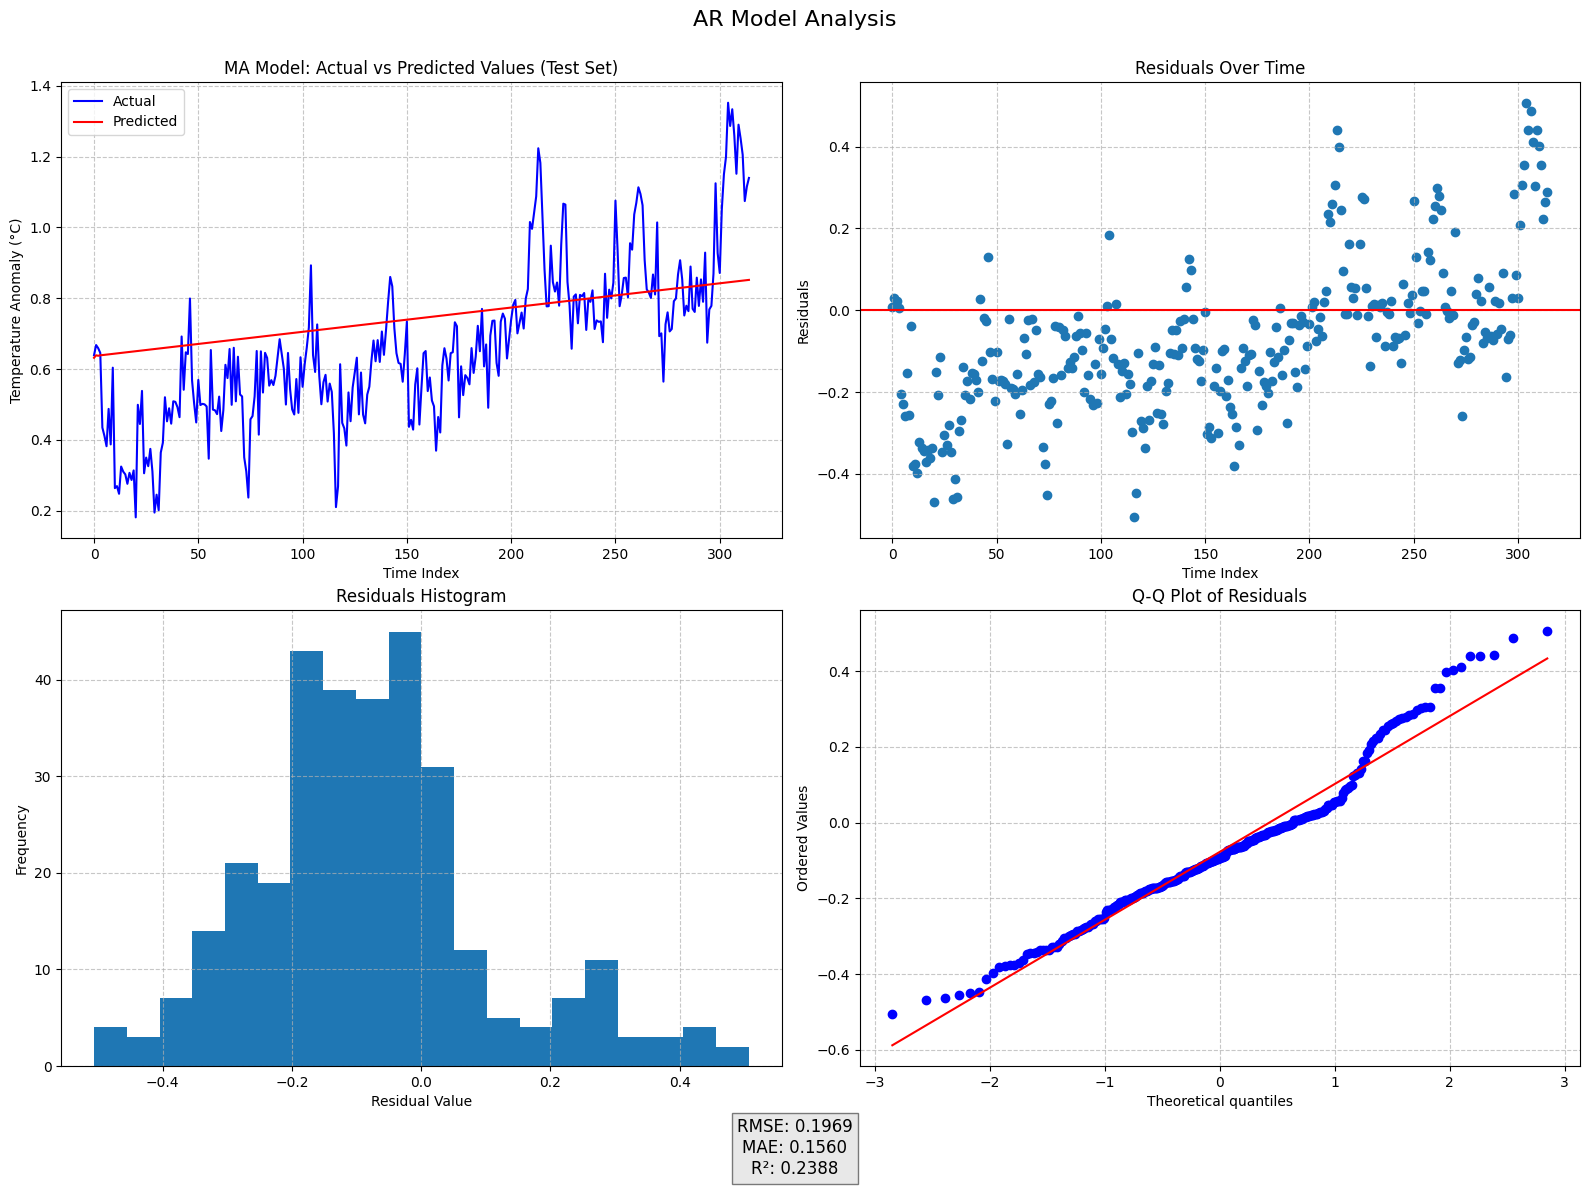

Shapiro-Wilk Test for Normality of Residuals:
W-statistic: 0.9645
p-value: 0.0000
Residuals do not appear to be normally distributed (reject H0)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy import stats

# Load data
data = pd.read_csv('/content/flat-ui__data-Fri Apr 18 2025.csv')
# Filter for GCAG data only
gcag_df = data[data['Source'] == 'gcag'].copy()

# Convert Year to datetime and set as index
gcag_df['Date'] = pd.to_datetime(gcag_df['Year'], format='%Y-%m')
gcag_df = gcag_df.sort_values('Date')
gcag_df = gcag_df.set_index('Date')

# Extract the Mean values
ts = gcag_df['Mean'].values

# First-order differencing to make the series stationary
diff_ts = np.diff(ts)

# Train-test split (85-15)
train_size = int(len(diff_ts) * 0.85)
train_data = diff_ts[:train_size]
test_data = diff_ts[train_size:]

# Save the last value of the training set for undifferencing later
last_train_value = ts[train_size]

# Based on the ACF plot, choose q=1 (significant spike at lag 1)
# Using ARIMA(0,0,1) for MA(1) model on already differenced data
model = ARIMA(train_data, order=(1, 0, 0))
model_fit = model.fit()
print(model_fit.summary())

# Make predictions on the differenced test set
predictions_diff = model_fit.forecast(steps=len(test_data))

# Convert the differenced predictions back to the original scale
predictions = [last_train_value]
for i in range(len(predictions_diff)):
    predictions.append(predictions[-1] + predictions_diff[i])
predictions = predictions[1:]  # Remove the initial value used for undifferencing

# Get actual test values in original scale
actual_values = ts[train_size+1:train_size+len(test_data)+1]

# Ensure predictions and actual values have the same length
min_len = min(len(predictions), len(actual_values))
predictions = predictions[:min_len]
actual_values = actual_values[:min_len]

print(f"Length of predictions: {len(predictions)}")
print(f"Length of actual values: {len(actual_values)}")

# Calculate error metrics
rmse = np.sqrt(mean_squared_error(actual_values, predictions))
mae = mean_absolute_error(actual_values, predictions)
r2 = r2_score(actual_values, predictions)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Calculate residuals
residuals = actual_values - predictions

# Plotting
plt.figure(figsize=(16, 12))

# Plot 1: Actual vs Predicted (Test Set Only)
plt.subplot(2, 2, 1)
plt.plot(range(len(actual_values)), actual_values, label='Actual', color='blue')
plt.plot(range(len(predictions)), predictions, label='Predicted', color='red')
plt.title('MA Model: Actual vs Predicted Values (Test Set)')
plt.xlabel('Time Index')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Plot 2: Residuals Over Time
plt.subplot(2, 2, 2)
plt.scatter(range(len(residuals)), residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuals Over Time')
plt.xlabel('Time Index')
plt.ylabel('Residuals')
plt.grid(True, linestyle='--', alpha=0.7)

# Plot 3: Residuals Histogram
plt.subplot(2, 2, 3)
plt.hist(residuals, bins=20)
plt.title('Residuals Histogram')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)

# Plot 4: Q-Q Plot of Residuals
plt.subplot(2, 2, 4)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.grid(True, linestyle='--', alpha=0.7)

# Add metrics text box
metrics_text = f"RMSE: {rmse:.4f}\nMAE: {mae:.4f}\nR²: {r2:.4f}"
plt.figtext(0.5, 0.01, metrics_text, ha='center', fontsize=12,
            bbox=dict(facecolor='lightgray', alpha=0.5))

plt.tight_layout()
plt.suptitle('AR Model Analysis', fontsize=16, y=0.98)
plt.subplots_adjust(top=0.92, bottom=0.1)
plt.savefig('AR_model_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Test for normality of residuals
shapiro_test = stats.shapiro(residuals)
print(f"Shapiro-Wilk Test for Normality of Residuals:")
print(f"W-statistic: {shapiro_test[0]:.4f}")
print(f"p-value: {shapiro_test[1]:.4f}")
if shapiro_test[1] > 0.05:
    print("Residuals appear to be normally distributed (fail to reject H0)")
else:
    print("Residuals do not appear to be normally distributed (reject H0)")

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1779
Model:                 ARIMA(1, 0, 1)   Log Likelihood                1220.062
Date:                Sun, 20 Apr 2025   AIC                          -2432.124
Time:                        16:02:55   BIC                          -2410.189
Sample:                             0   HQIC                         -2424.022
                               - 1779                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.001      0.838      0.402      -0.001       0.002
ar.L1          0.4653      0.028     16.826      0.000       0.411       0.519
ma.L1         -0.8805      0.017    -51.368      0.0

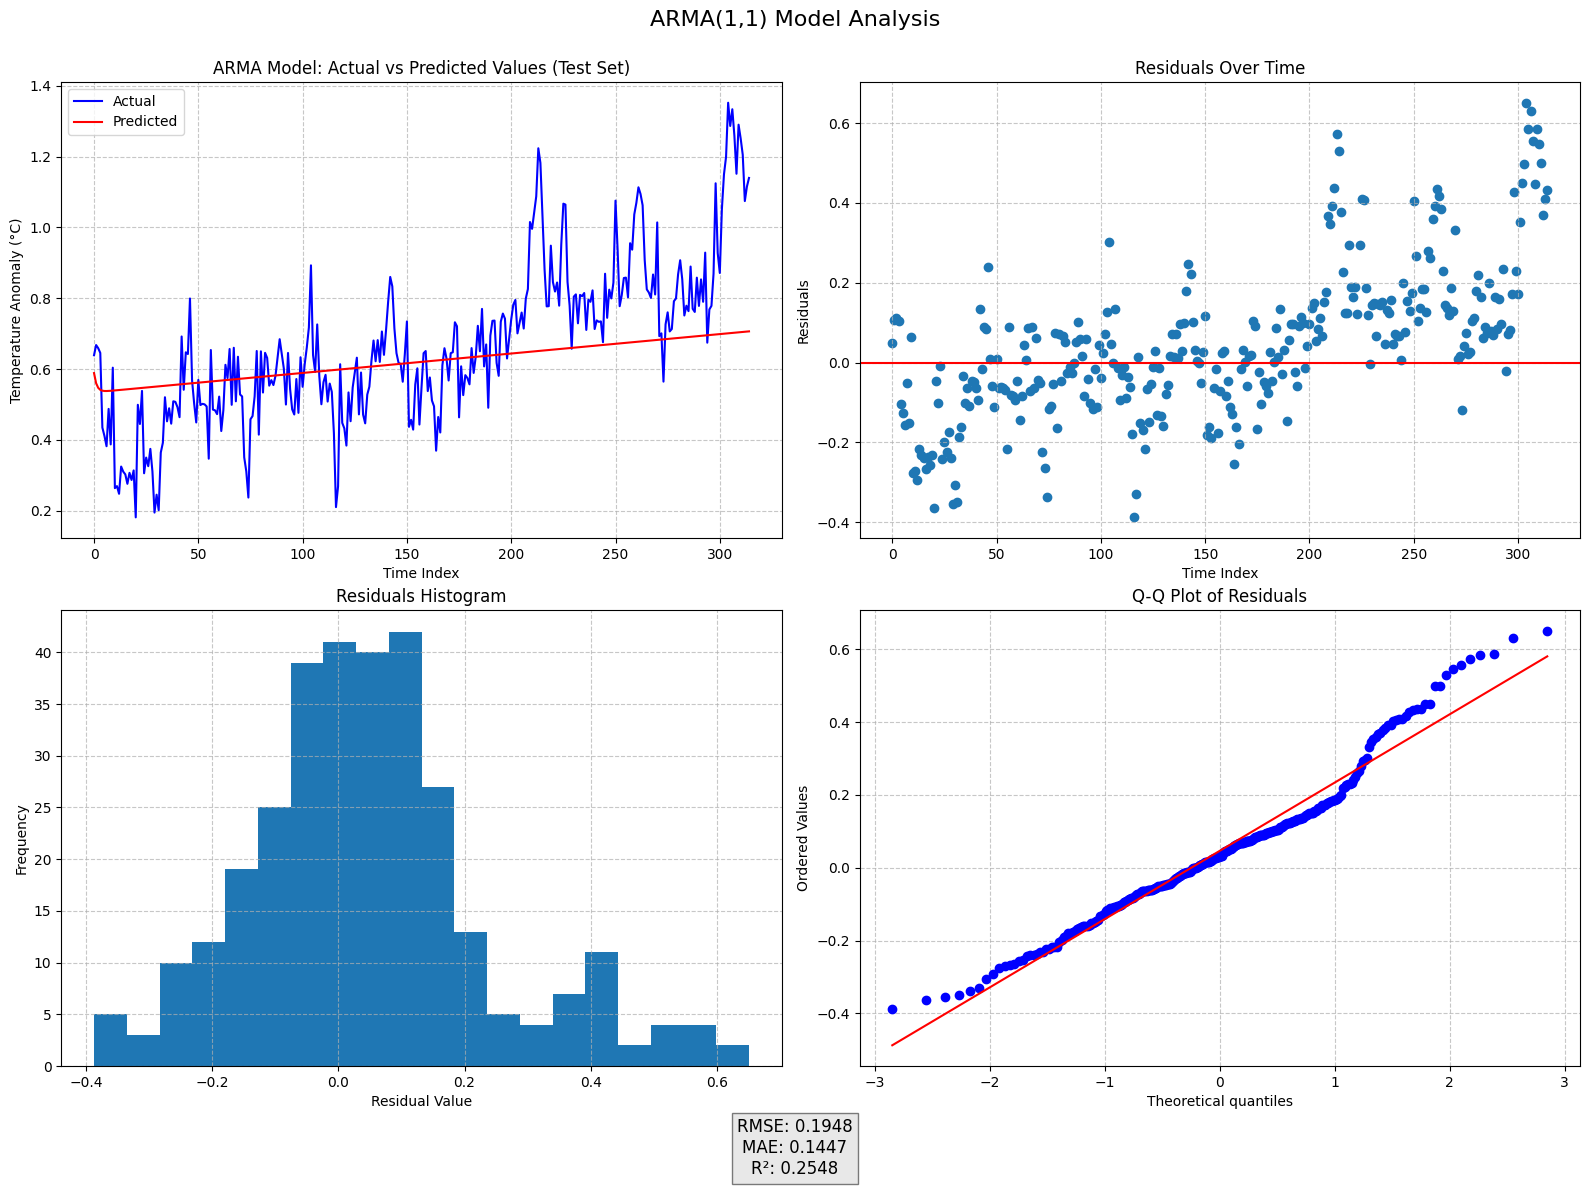

Shapiro-Wilk Test for Normality of Residuals:
W-statistic: 0.9668
p-value: 0.0000
Residuals do not appear to be normally distributed (reject H0)

Comparing this ARMA(2,1) model with previous models:
ARMA(2,1) - RMSE: 0.1948, MAE: 0.1447, R²: 0.2548


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy import stats

# Load data
data = pd.read_csv('/content/flat-ui__data-Fri Apr 18 2025.csv')
# Filter for GCAG data only
gcag_df = data[data['Source'] == 'gcag'].copy()

# Convert Year to datetime and set as index
gcag_df['Date'] = pd.to_datetime(gcag_df['Year'], format='%Y-%m')
gcag_df = gcag_df.sort_values('Date')
gcag_df = gcag_df.set_index('Date')

# Extract the Mean values
ts = gcag_df['Mean'].values

# First-order differencing to make the series stationary
diff_ts = np.diff(ts)

# Train-test split (85-15)
train_size = int(len(diff_ts) * 0.85)
train_data = diff_ts[:train_size]
test_data = diff_ts[train_size:]

# Save the last value of the training set for undifferencing later
last_train_value = ts[train_size]

# Based on the ACF and PACF plots, choose p=2, q=1 for ARMA(2,1) model
# Using ARIMA(2,0,1) for ARMA(2,1) model on already differenced data
model = ARIMA(train_data, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.summary())

# Make predictions on the differenced test set
predictions_diff = model_fit.forecast(steps=len(test_data))

# Convert the differenced predictions back to the original scale
predictions = [last_train_value]
for i in range(len(predictions_diff)):
    predictions.append(predictions[-1] + predictions_diff[i])
predictions = predictions[1:]  # Remove the initial value used for undifferencing

# Get actual test values in original scale
actual_values = ts[train_size+1:train_size+len(test_data)+1]

# Ensure predictions and actual values have the same length
min_len = min(len(predictions), len(actual_values))
predictions = predictions[:min_len]
actual_values = actual_values[:min_len]

print(f"Length of predictions: {len(predictions)}")
print(f"Length of actual values: {len(actual_values)}")

# Calculate error metrics
rmse = np.sqrt(mean_squared_error(actual_values, predictions))
mae = mean_absolute_error(actual_values, predictions)
r2 = r2_score(actual_values, predictions)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Calculate residuals
residuals = actual_values - predictions

# Plotting
plt.figure(figsize=(16, 12))

# Plot 1: Actual vs Predicted (Test Set Only)
plt.subplot(2, 2, 1)
plt.plot(range(len(actual_values)), actual_values, label='Actual', color='blue')
plt.plot(range(len(predictions)), predictions, label='Predicted', color='red')
plt.title('ARMA Model: Actual vs Predicted Values (Test Set)')
plt.xlabel('Time Index')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Plot 2: Residuals Over Time
plt.subplot(2, 2, 2)
plt.scatter(range(len(residuals)), residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuals Over Time')
plt.xlabel('Time Index')
plt.ylabel('Residuals')
plt.grid(True, linestyle='--', alpha=0.7)

# Plot 3: Residuals Histogram
plt.subplot(2, 2, 3)
plt.hist(residuals, bins=20)
plt.title('Residuals Histogram')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)

# Plot 4: Q-Q Plot of Residuals
plt.subplot(2, 2, 4)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.grid(True, linestyle='--', alpha=0.7)

# Add metrics text box
metrics_text = f"RMSE: {rmse:.4f}\nMAE: {mae:.4f}\nR²: {r2:.4f}"
plt.figtext(0.5, 0.01, metrics_text, ha='center', fontsize=12,
            bbox=dict(facecolor='lightgray', alpha=0.5))

plt.tight_layout()
plt.suptitle('ARMA(1,1) Model Analysis', fontsize=16, y=0.98)
plt.subplots_adjust(top=0.92, bottom=0.1)
plt.savefig('arma_model_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Test for normality of residuals
shapiro_test = stats.shapiro(residuals)
print(f"Shapiro-Wilk Test for Normality of Residuals:")
print(f"W-statistic: {shapiro_test[0]:.4f}")
print(f"p-value: {shapiro_test[1]:.4f}")
if shapiro_test[1] > 0.05:
    print("Residuals appear to be normally distributed (fail to reject H0)")
else:
    print("Residuals do not appear to be normally distributed (reject H0)")

# Compare different models
print("\nComparing this ARMA(2,1) model with previous models:")
print(f"ARMA(2,1) - RMSE: {rmse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")

Training set size: 1424 sequences
Validation set size: 305 sequences
Testing set size: 306 sequences


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 13s 153ms/step - loss: 0.0299 - val_loss: 0.0137
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 157ms/step - loss: 0.0061 - val_loss: 0.0055
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 164ms/step - loss: 0.0059 - val_loss: 0.0038
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 158ms/step - loss: 0.0057 - val_loss: 0.0037
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 138ms/step - loss: 0.0055 - val_loss: 0.0038
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 144ms/step - loss: 0.0052 - val_loss: 0.0036
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 157ms/step - loss: 0.0049 - val_loss: 0.0033
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 163ms/step - loss: 0.0048 - val_loss: 0.0032
Epoch 9/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 137ms/step - loss: 0.0051 - val_loss: 0.0033
Epoch 10/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 132ms/step - loss: 0.0048 - val_loss: 0.0030
Epoch 11/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 138ms/step - loss: 0.0051 - val_loss: 0.0030
Epoch 12/100
45/45 ━━━━━━━━━━━━━

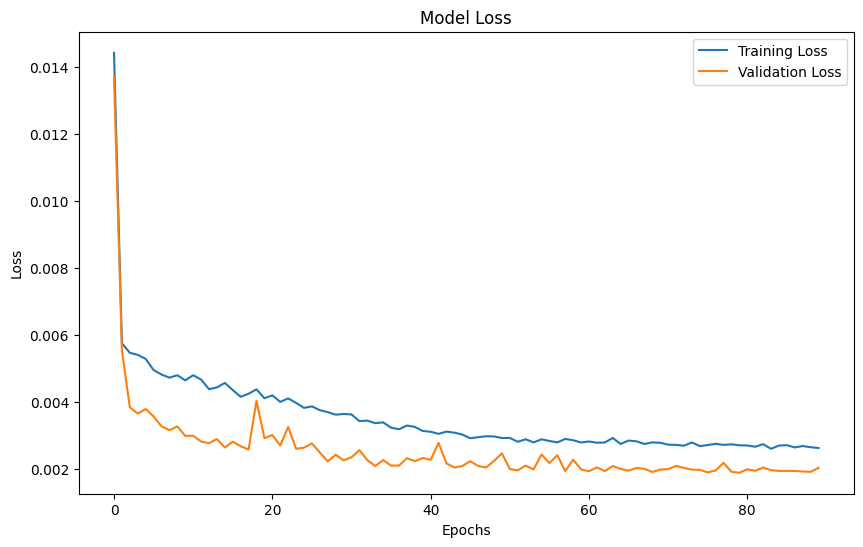

45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step

Model Performance Metrics:
Training Set - RMSE: 0.1205, MAE: 0.0908, R²: 0.6800
Validation Set - RMSE: 0.1043, MAE: 0.0811, R²: 0.7430
Testing Set - RMSE: 0.1018, MAE: 0.0823, R²: 0.7985


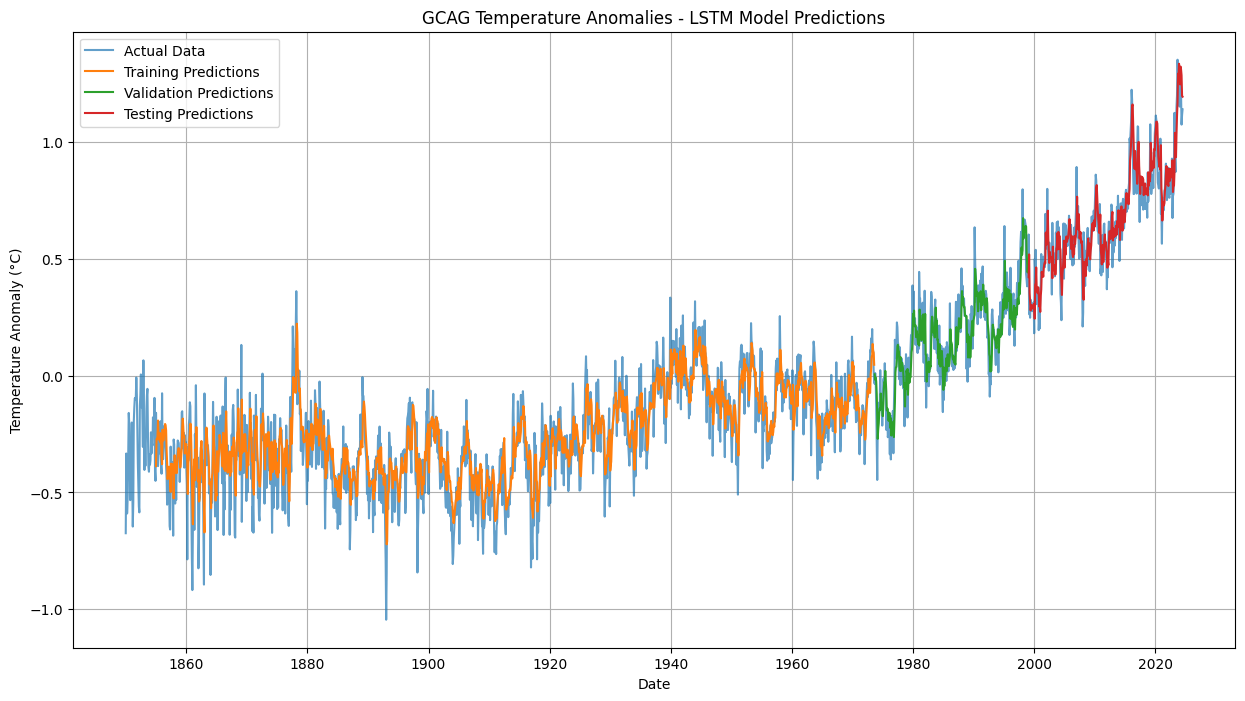

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import math
import tensorflow as tf
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)


# Step 1: Load and preprocess the data
df = pd.read_csv('/content/flat-ui__data-Fri Apr 18 2025.csv')

# Filter to only include GCAG data
df_gcag = df[df['Source'] == 'gcag'].copy()

# Convert the Year column to datetime
df_gcag['Date'] = pd.to_datetime(df_gcag['Year'], format='%Y-%m')
df_gcag.set_index('Date', inplace=True)
df_gcag.sort_index(inplace=True)

# Step 2: Prepare data for LSTM
data = df_gcag['Mean'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

# Create sequences for LSTM input
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length, 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

# Define sequence length (number of months to look back)
seq_length = 60

# Create sequences
X, y = create_sequences(data_normalized, seq_length)

# Reshape X to match LSTM input format [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Step 3: Split into train, validation, and test sets (70-15-15)
train_size = int(len(X) * 0.7)
val_size = int(len(X) * 0.15)
test_size = len(X) - train_size - val_size

X_train, X_val, X_test = X[:train_size], X[train_size:train_size+val_size], X[train_size+val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size+val_size], y[train_size+val_size:]

print(f"Training set size: {X_train.shape[0]} sequences")
print(f"Validation set size: {X_val.shape[0]} sequences")
print(f"Testing set size: {X_test.shape[0]} sequences")

# Step 4: Build LSTM model
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=32))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
learning_rate = 0.001  # Define your desired learning rate
optimizer = Adam(learning_rate=learning_rate)  # Create an Adam optimizer with the learning rate
model.compile(optimizer=optimizer, loss='mean_squared_error')
# Define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Step 5: Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stop],
    verbose=1
)

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Step 6: Evaluate the model
train_predict = model.predict(X_train)
val_predict = model.predict(X_val)
test_predict = model.predict(X_test)

# Inverse transform predictions to original scale
train_predict = scaler.inverse_transform(train_predict)
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))

val_predict = scaler.inverse_transform(val_predict)
y_val_inv = scaler.inverse_transform(y_val.reshape(-1, 1))

test_predict = scaler.inverse_transform(test_predict)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate metrics: RMSE, MAE, R²
def calculate_metrics(actual, predicted):
    rmse = math.sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)
    r2 = r2_score(actual, predicted)
    return rmse, mae, r2

train_rmse, train_mae, train_r2 = calculate_metrics(y_train_inv, train_predict)
val_rmse, val_mae, val_r2 = calculate_metrics(y_val_inv, val_predict)
test_rmse, test_mae, test_r2 = calculate_metrics(y_test_inv, test_predict)

print("\nModel Performance Metrics:")
print(f"Training Set - RMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R²: {train_r2:.4f}")
print(f"Validation Set - RMSE: {val_rmse:.4f}, MAE: {val_mae:.4f}, R²: {val_r2:.4f}")
print(f"Testing Set - RMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R²: {test_r2:.4f}")

# Step 7: Plot results with all three data splits
# Create base plot array
train_plot = np.empty_like(data)
train_plot[:, :] = np.nan
val_plot = np.empty_like(data)
val_plot[:, :] = np.nan
test_plot = np.empty_like(data)
test_plot[:, :] = np.nan

# Fill with predictions (accounting for sequence length offset)
train_plot[seq_length:len(train_predict) + seq_length, :] = train_predict
val_plot[len(train_predict) + seq_length:len(train_predict) + len(val_predict) + seq_length, :] = val_predict
test_plot[len(train_predict) + len(val_predict) + seq_length:len(data), :] = test_predict

# Plot actual vs predictions
plt.figure(figsize=(15, 8))
plt.plot(df_gcag.index, data, label='Actual Data', alpha=0.7)
plt.plot(df_gcag.index, train_plot, label='Training Predictions')
plt.plot(df_gcag.index, val_plot, label='Validation Predictions')
plt.plot(df_gcag.index, test_plot, label='Testing Predictions')
plt.title('GCAG Temperature Anomalies - LSTM Model Predictions')
plt.xlabel('Date')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend()
plt.grid(True)
plt.show()

